In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob
import seaborn as sns
from open_ephys.analysis import Session

from pynwb import NWBHDF5IO, NWBFile
from pynwb.file import Subject

from datetime import datetime
from dateutil.tz import tzlocal

from jlh_ephys.analysis import Analysis
from jlh_ephys.utils import choose_stim_parameter, OE
from jlh_ephys.psth_raster import psth_arr 
#from jlh_ephys import spatial_tools as st  ## compatability issues maybe need to install from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache in its own env 
from jlh_ephys.raw import find_artifact_start, align_data, raw_heatmap

from ccf_3D.tools import herbs_processing as hp
from ccf_3D.tools.metrics import distance

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [8]:
jlh31 = Analysis('jlh31', '2023-01-24') # all probes, many params and sites
jlh32 = Analysis('jlh32', '2023-02-18') # all probes, many params and sites
jlh33 = Analysis('jlh33', '2023-02-22') # probe B and C, many params and trains in diff recordings
jlh34 = Analysis('jlh34', '2023-05-15') # all 3 many params
jlh39 = Analysis('jlh39', '2023-08-16') # 3 probes for bi, no A for mono
jlh40 = Analysis('jlh40', '2023-08-21') # probeB and probe C only: monopolar -- with diff pulse width
jlh48 = Analysis('jlh48', '2024-11-05') # bb test, sorted only no bb portion (full bi and mono)
jlh49 = Analysis('jlh49v1', '2024-07-11') # bb test, just no bb portion (full bi only)
jlh53 = Analysis('jlh53concat', '2024-09-03') # regular, all 3 probes, probe A broke sometime. 

recordings = [jlh31, jlh32, jlh33, jlh34, jlh39, jlh40, jlh48, jlh49, jlh53]
for r in recordings:
    r.get_brain_regs()
    r.get_electrode_coords()

nn_contacts_labels = [6,11,3,14,1,16,2,15,5,12,4,13,7,10,8,9]

fig1_path = r"C:\Users\jordan\Documents\combined_figs\figure1"

amp_alphas = {5: 0.3, 25: 0.5, 50: 0.7, 100: 1.0}
bipolar_color = '#82A69D'
cathodal_color = '#161943'
anodal_color = '#D99551'

c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB found. Trials and Units loaded


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loaded
INFO:root:Final adjusted brain regions loaded
INFO:root:Final adjusted coordinates loade

NWB found. Trials and Units loaded


# raw AP data plot (Figure 1c)

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', 'A', 'V', 'a', 'c', 'e', 'f', 'five', 'four', 'glyph00001', 'glyph00002', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'o', 'one', 'parenleft', 'parenright', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 19, 20, 21, 22, 23, 24, 36, 57, 66, 68, 70, 72

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 31 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', 'A', 'V', 'a', 'c', 'e', 'f', 'five', 'glyph00001', 'glyph00002', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'o', 'one', 'parenleft', 'parenright', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 19, 20, 21, 22, 24, 36, 57, 66, 68, 70, 72, 73, 75, 76

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 36 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', 'A', 'V', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'glyph00001', 'glyph00002', 'h', 'i', 'j', 'l', 'm', 'minus', 'n', 'o', 'one', 'p', 'parenleft', 'parenright', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 19, 20, 21, 22, 23, 24, 25, 2

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 35 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', 'A', 'V', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'glyph00001', 'glyph00002', 'h', 'i', 'j', 'l', 'm', 'minus', 'n', 'o', 'one', 'parenleft', 'parenright', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 19, 20, 21, 22, 23, 24, 25, 27, 36

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', 'A', 'V', 'a', 'c', 'e', 'f', 'five', 'four', 'glyph00001', 'glyph00002', 'h', 'i', 'j', 'l', 'm', 'minus', 'n', 'o', 'one', 'p', 'parenleft', 'parenright', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 19, 20, 21, 22, 23, 24, 25, 36, 57, 66, 68,

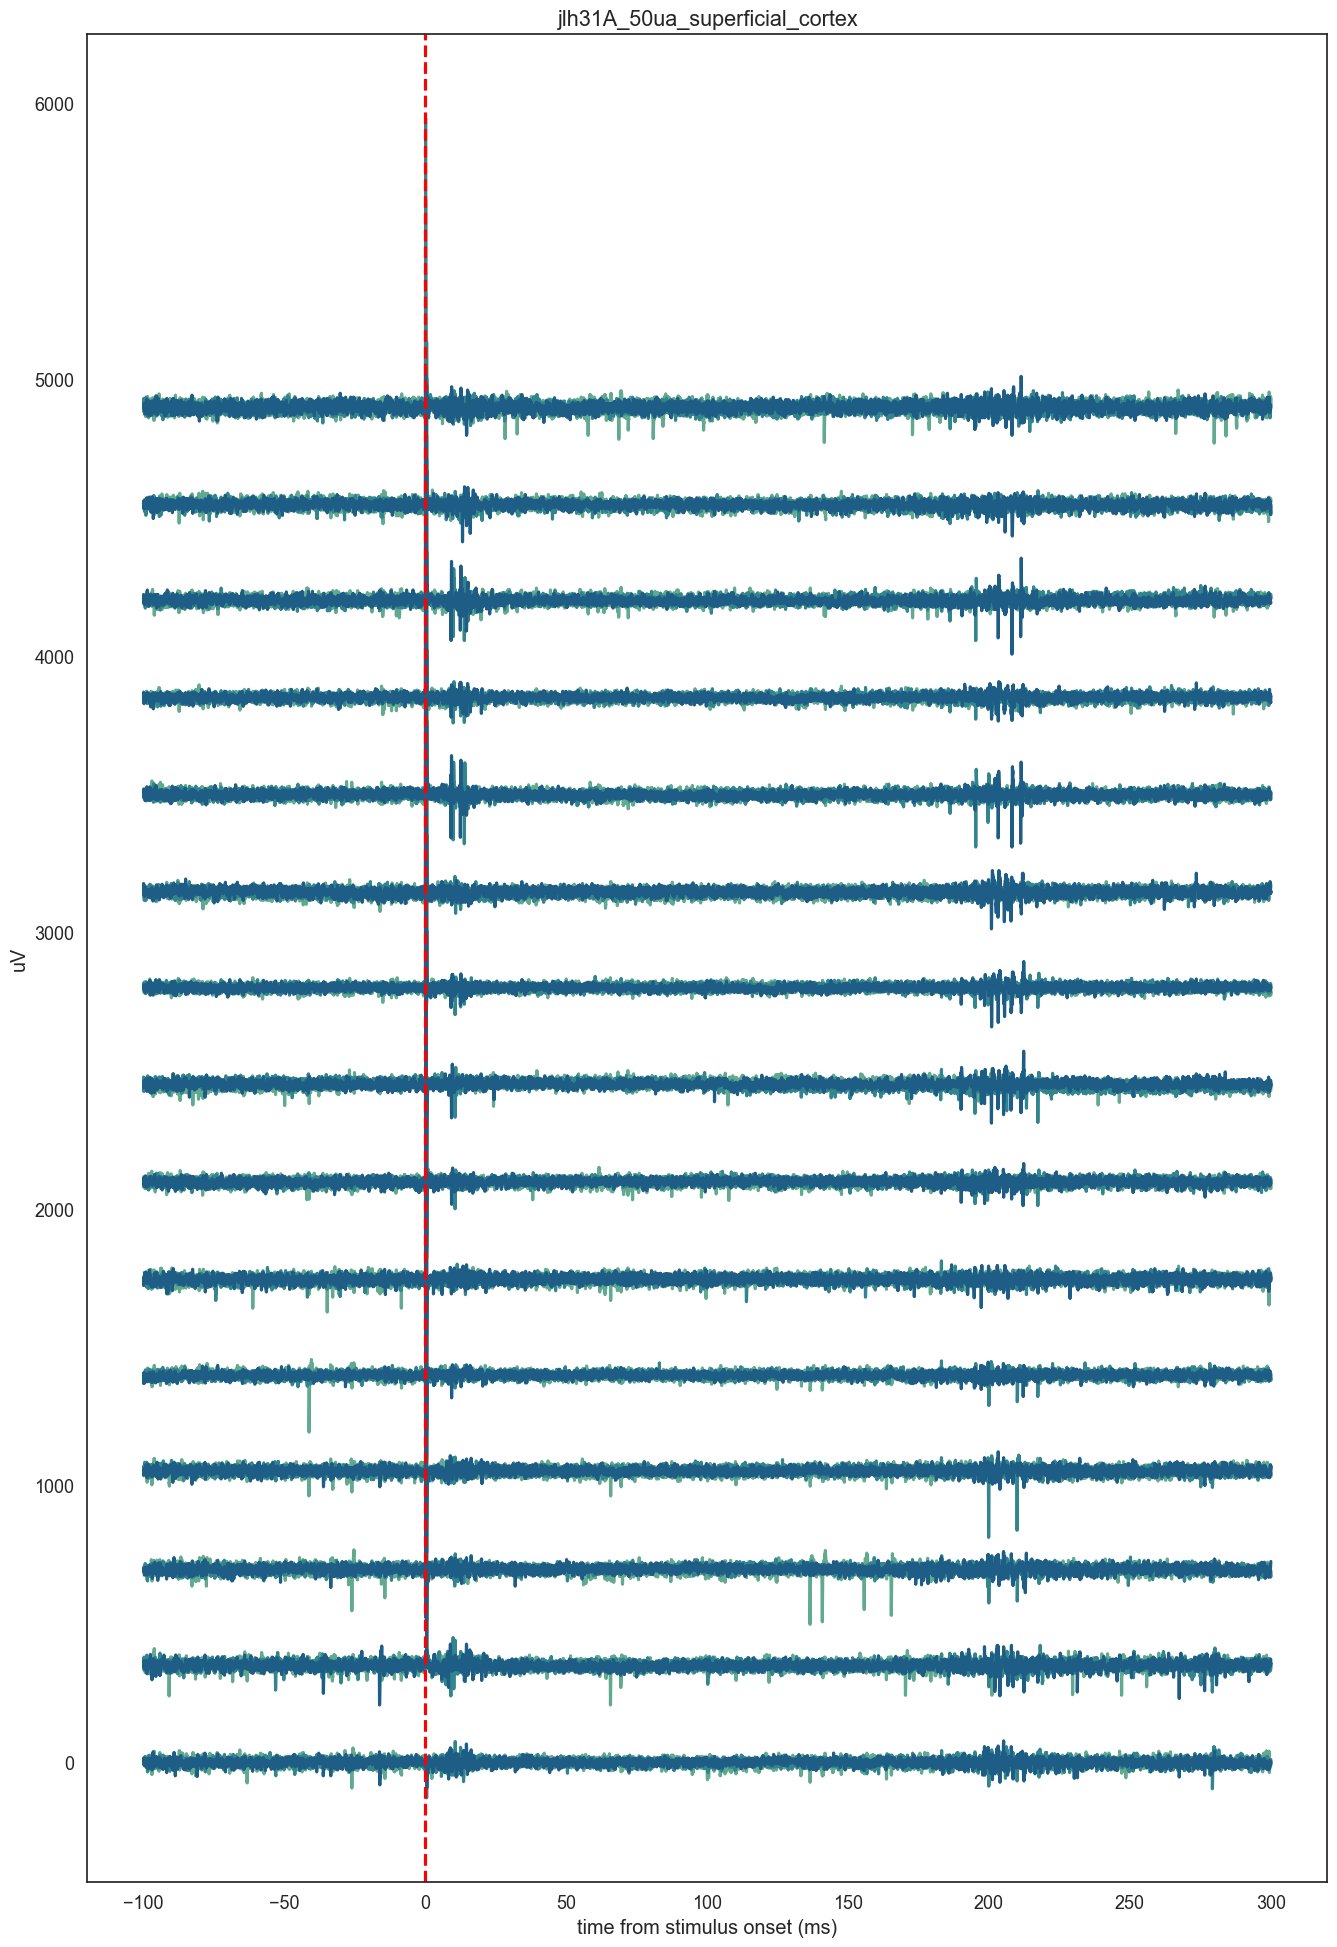

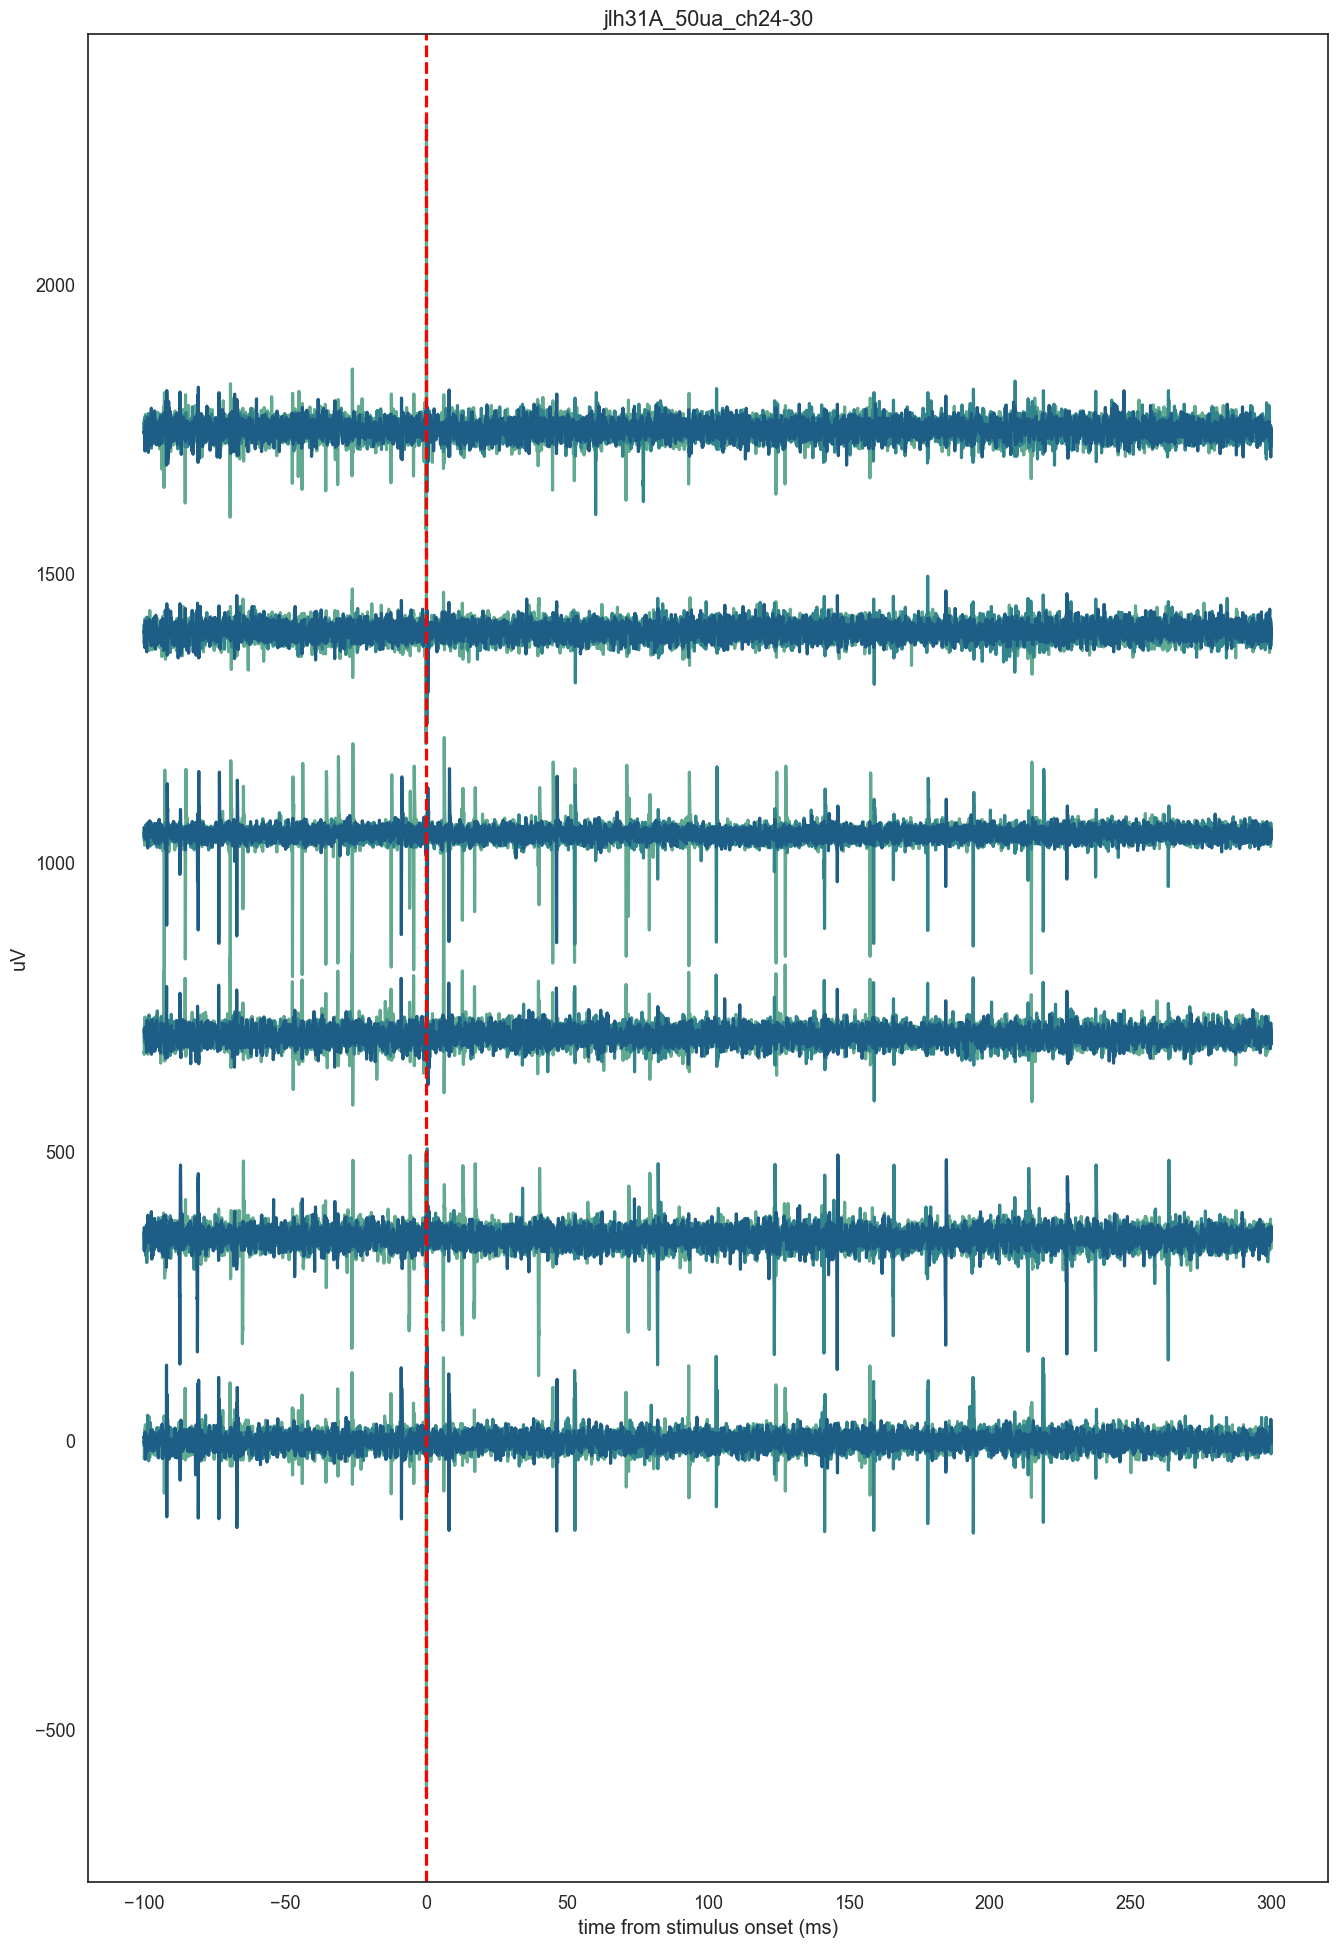

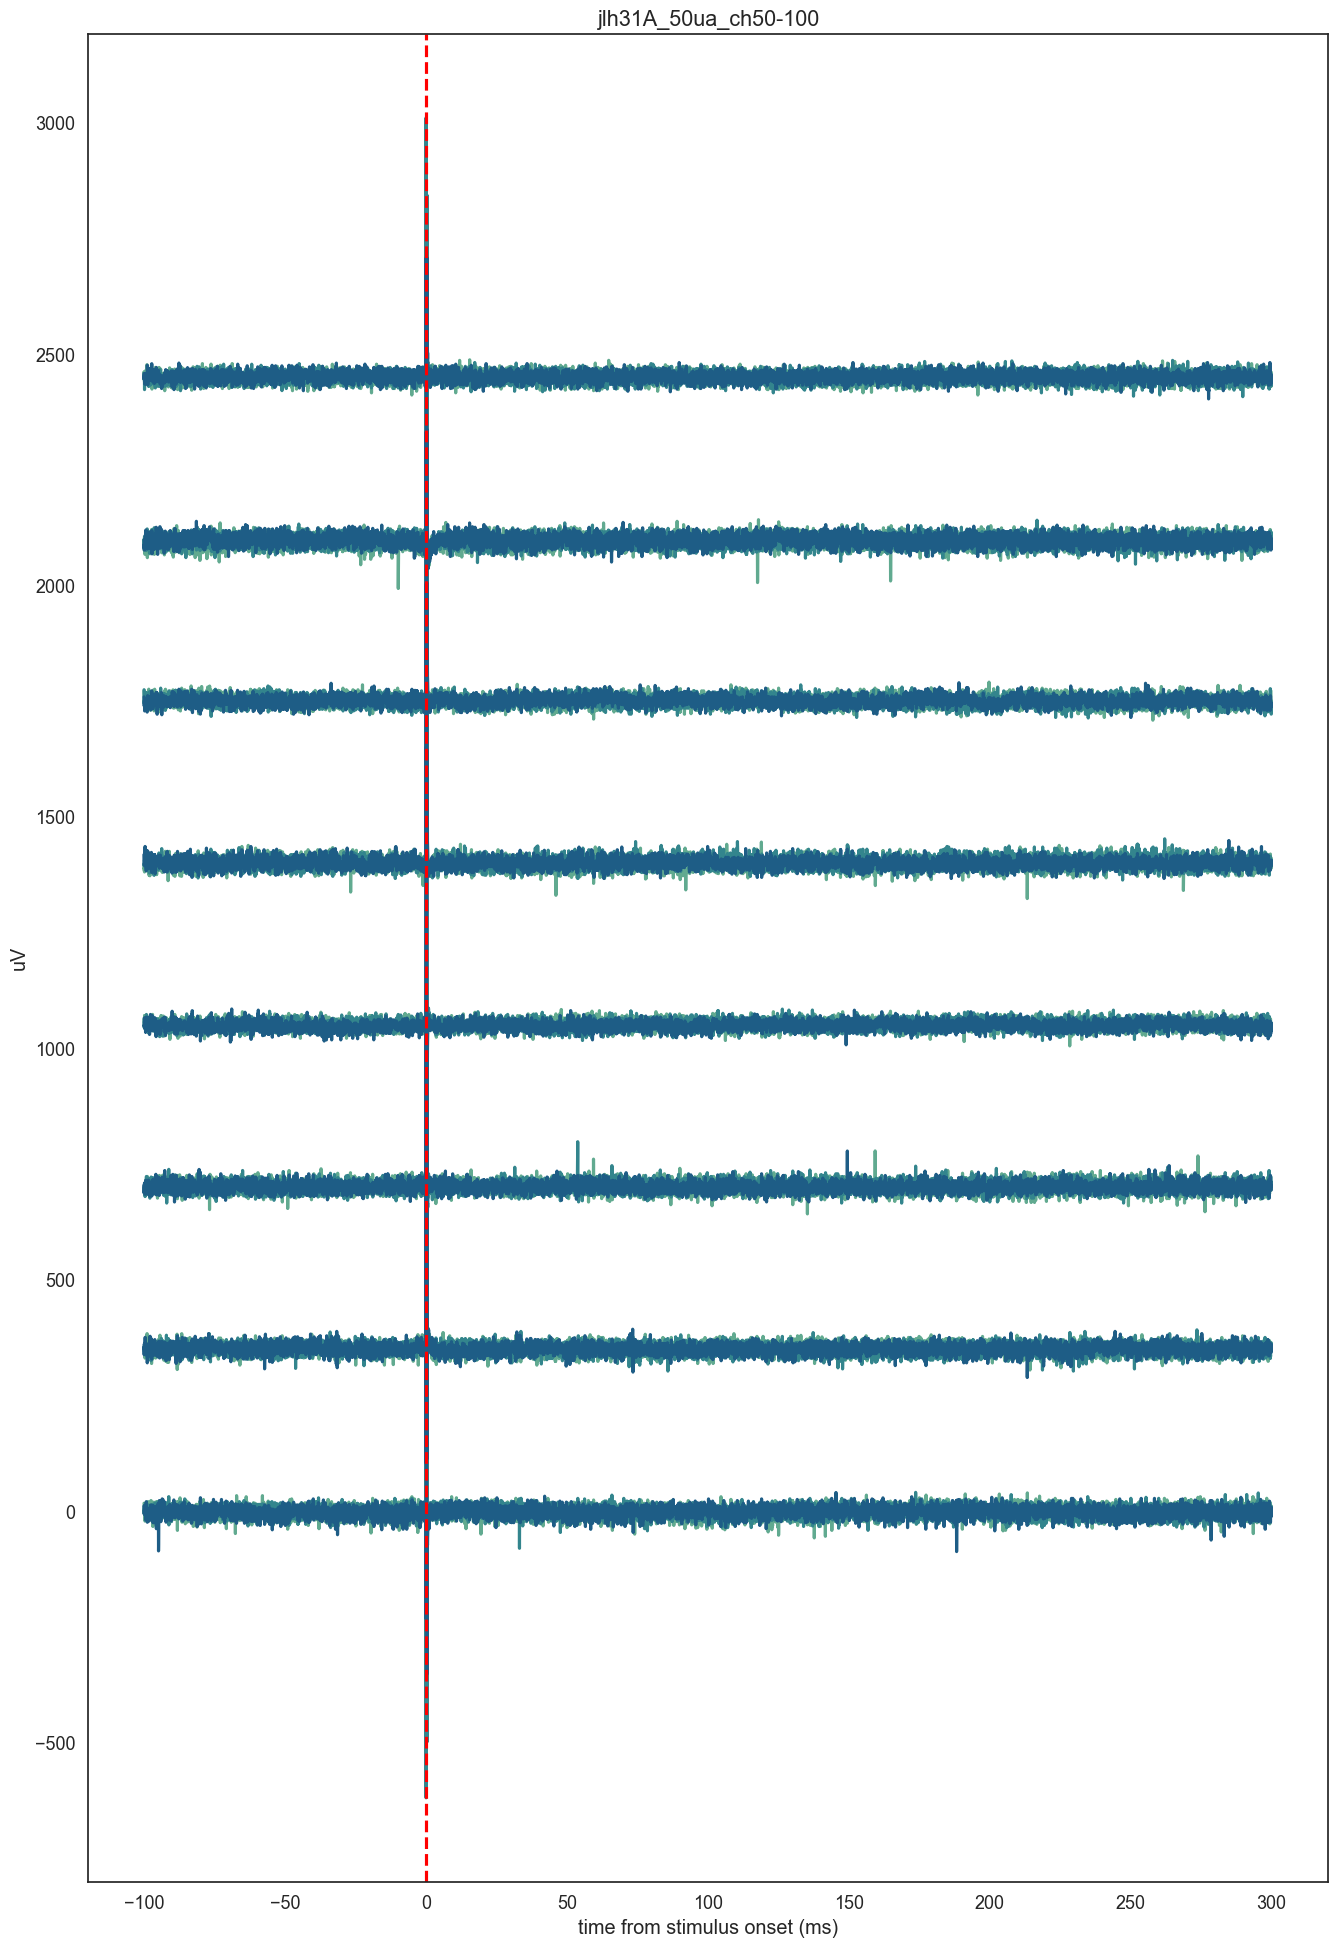

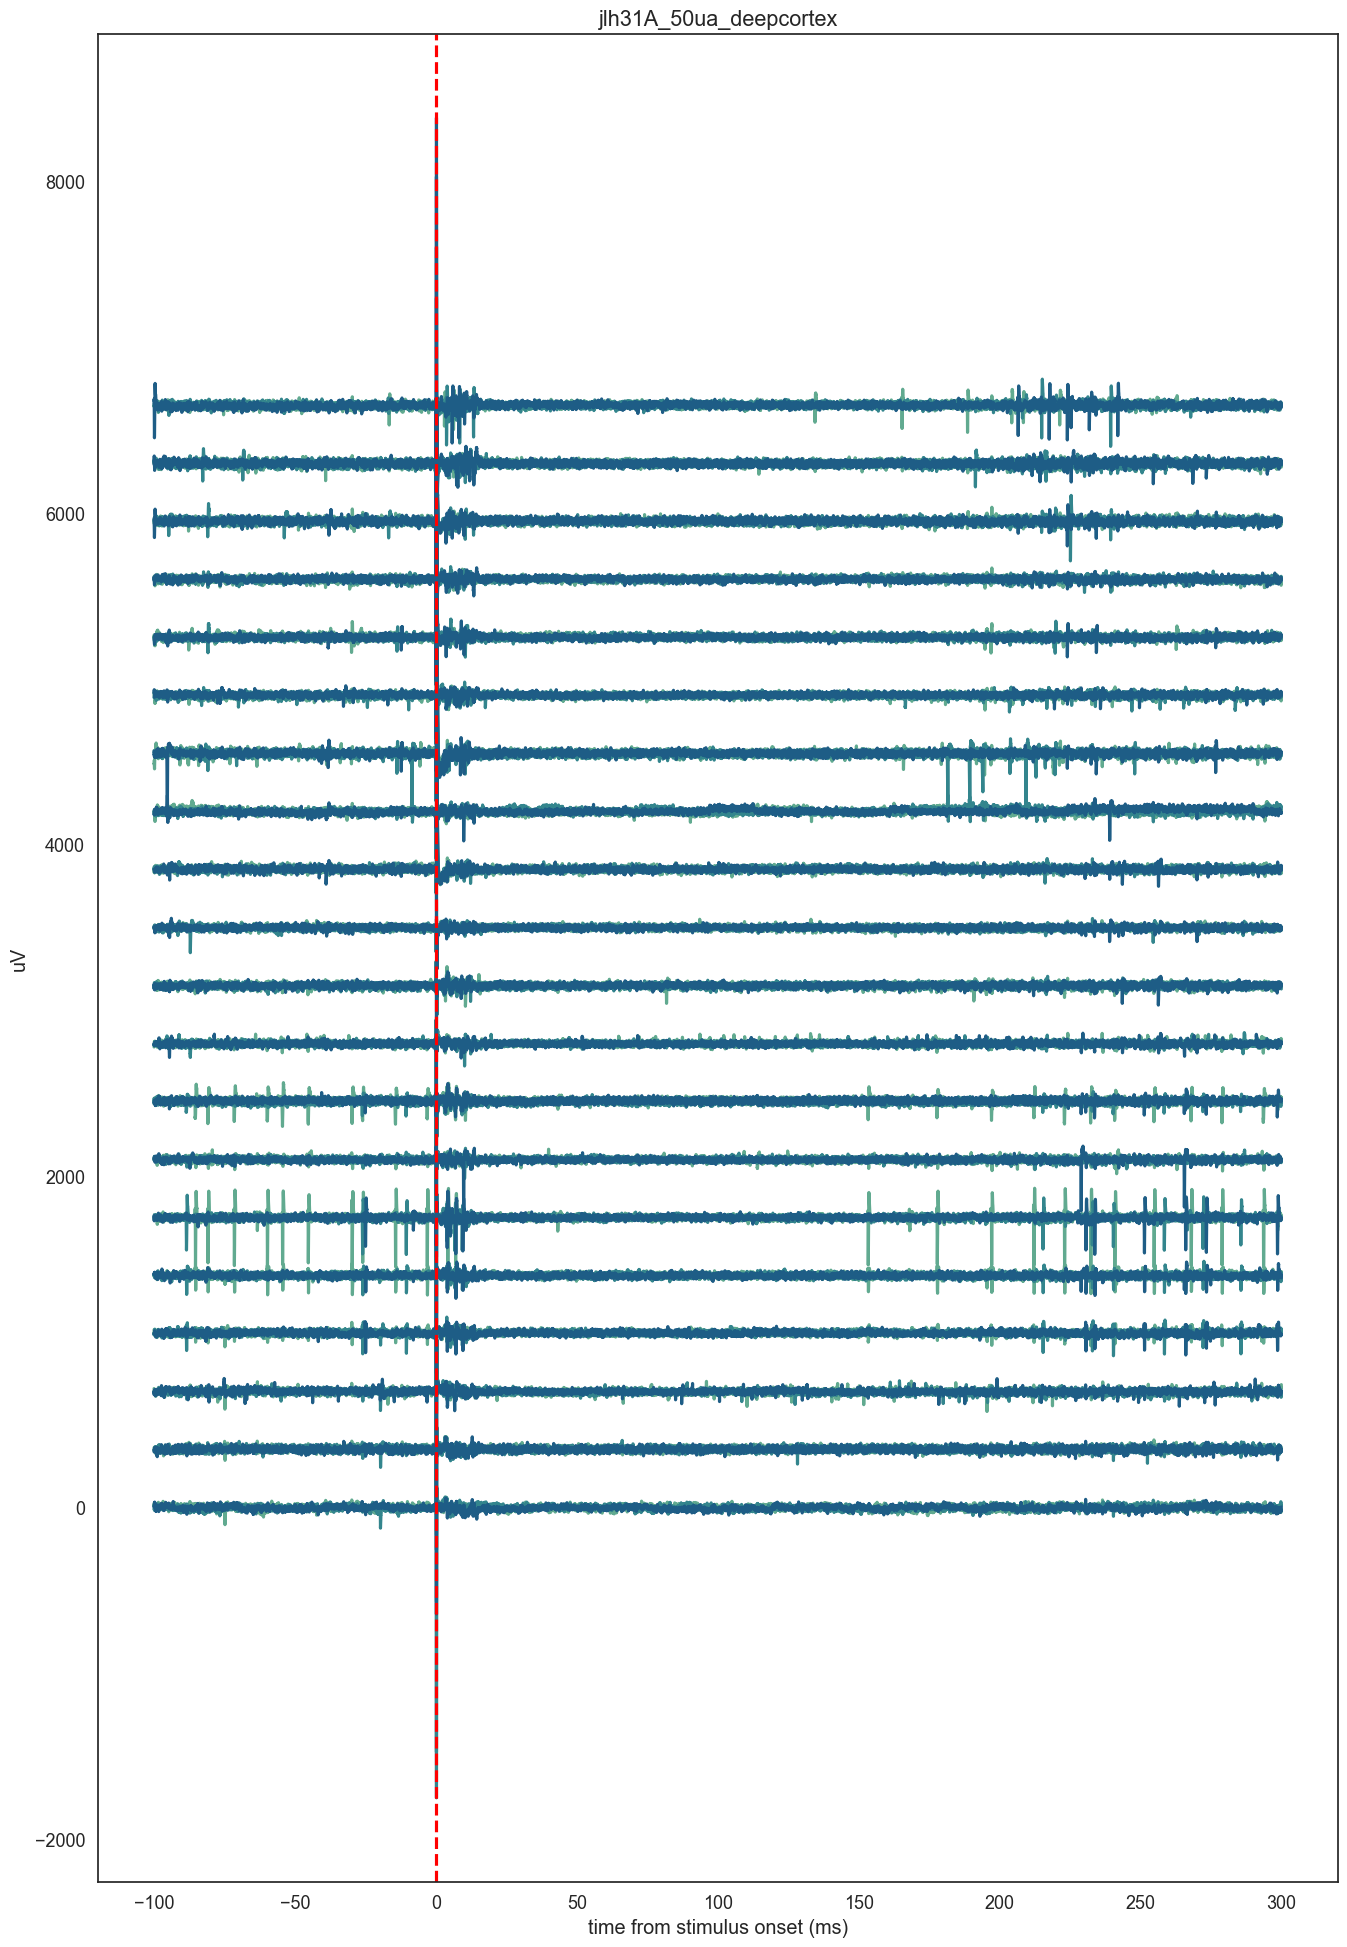

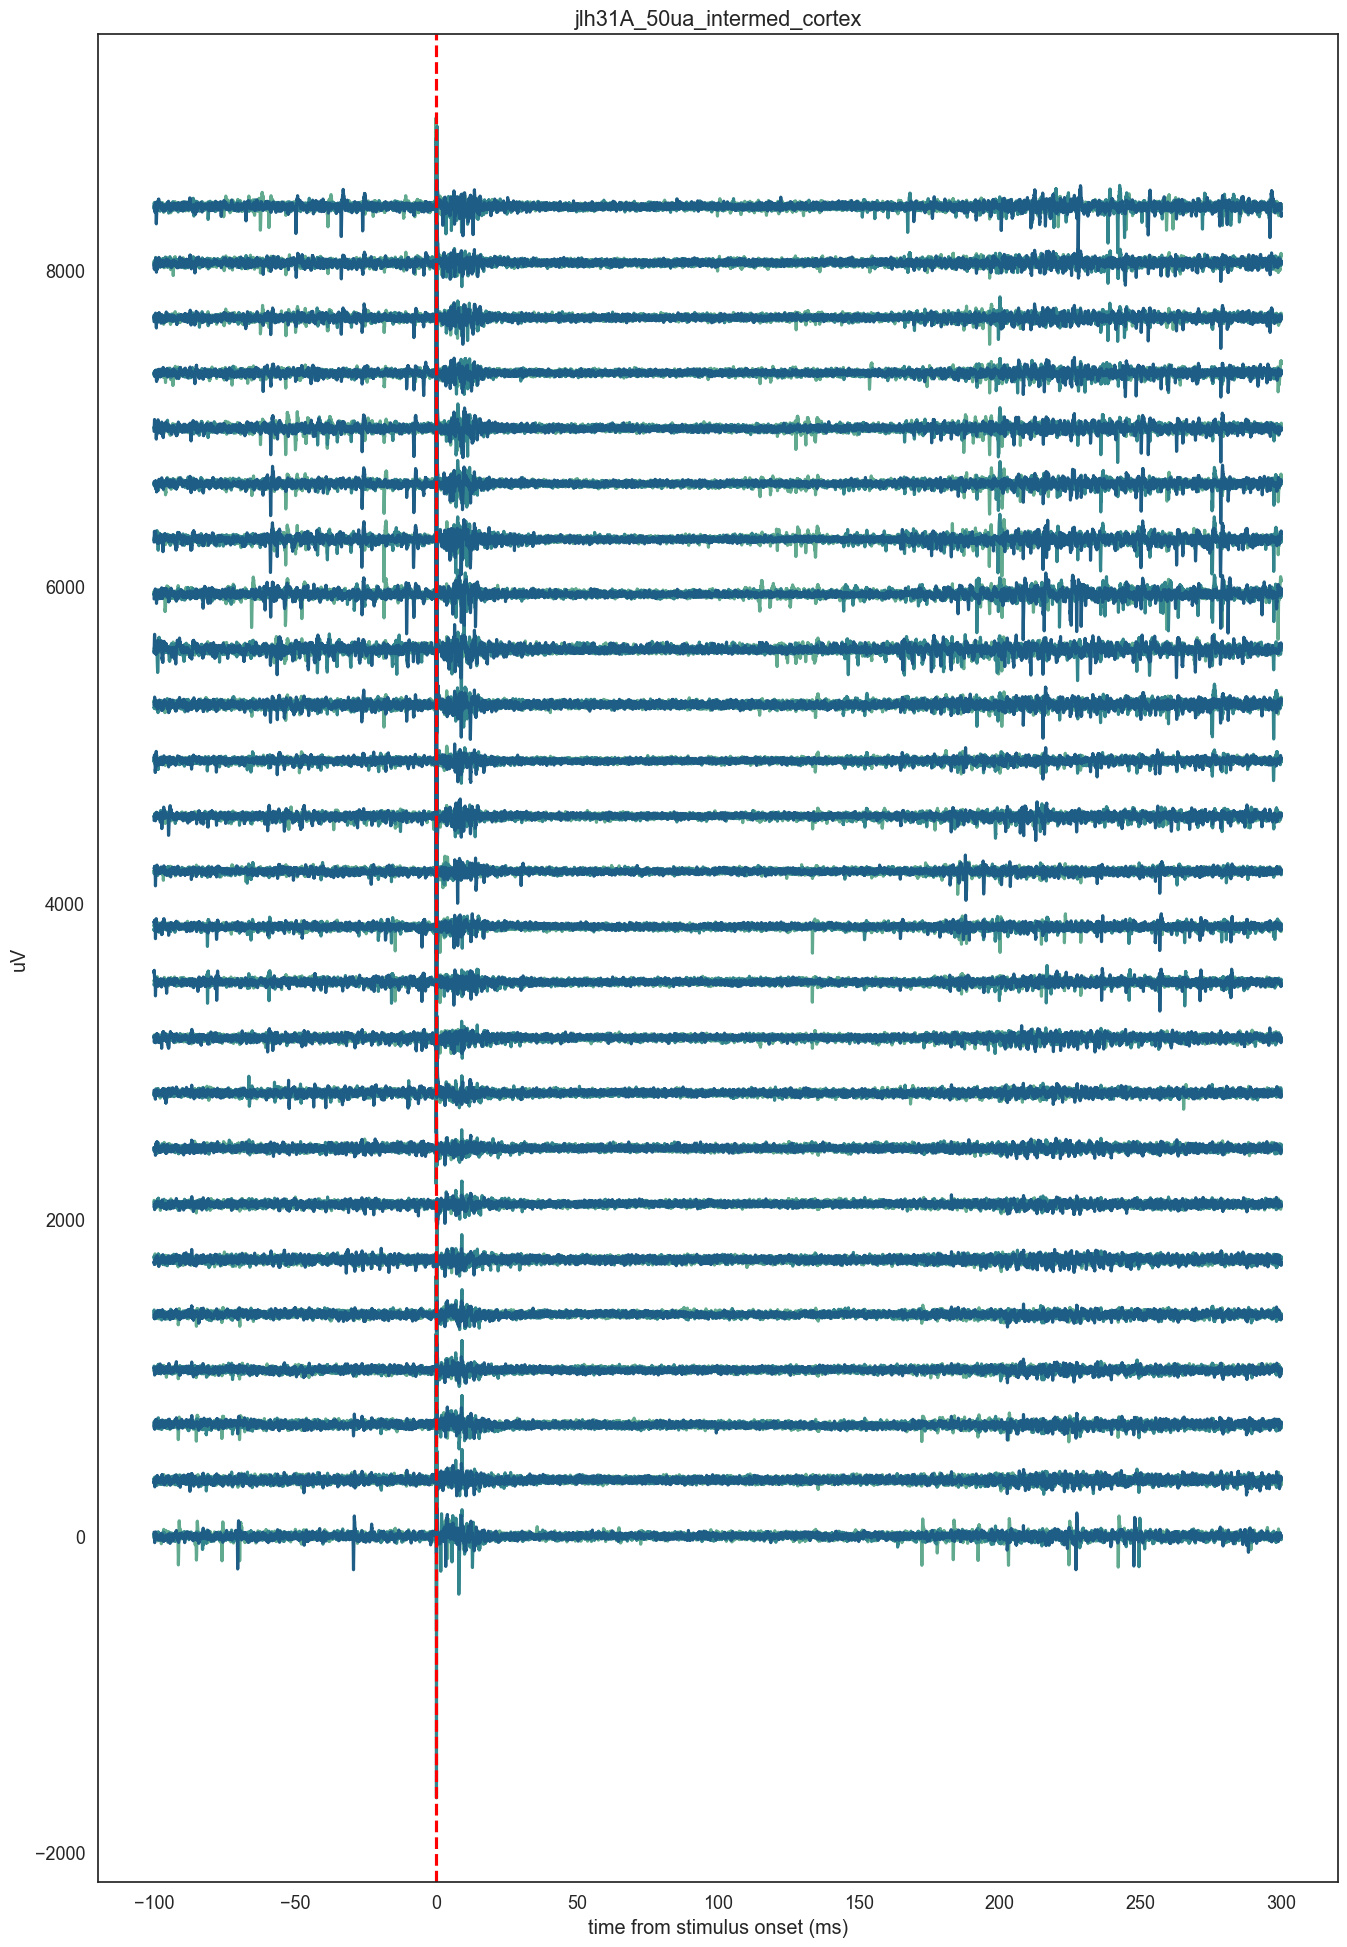

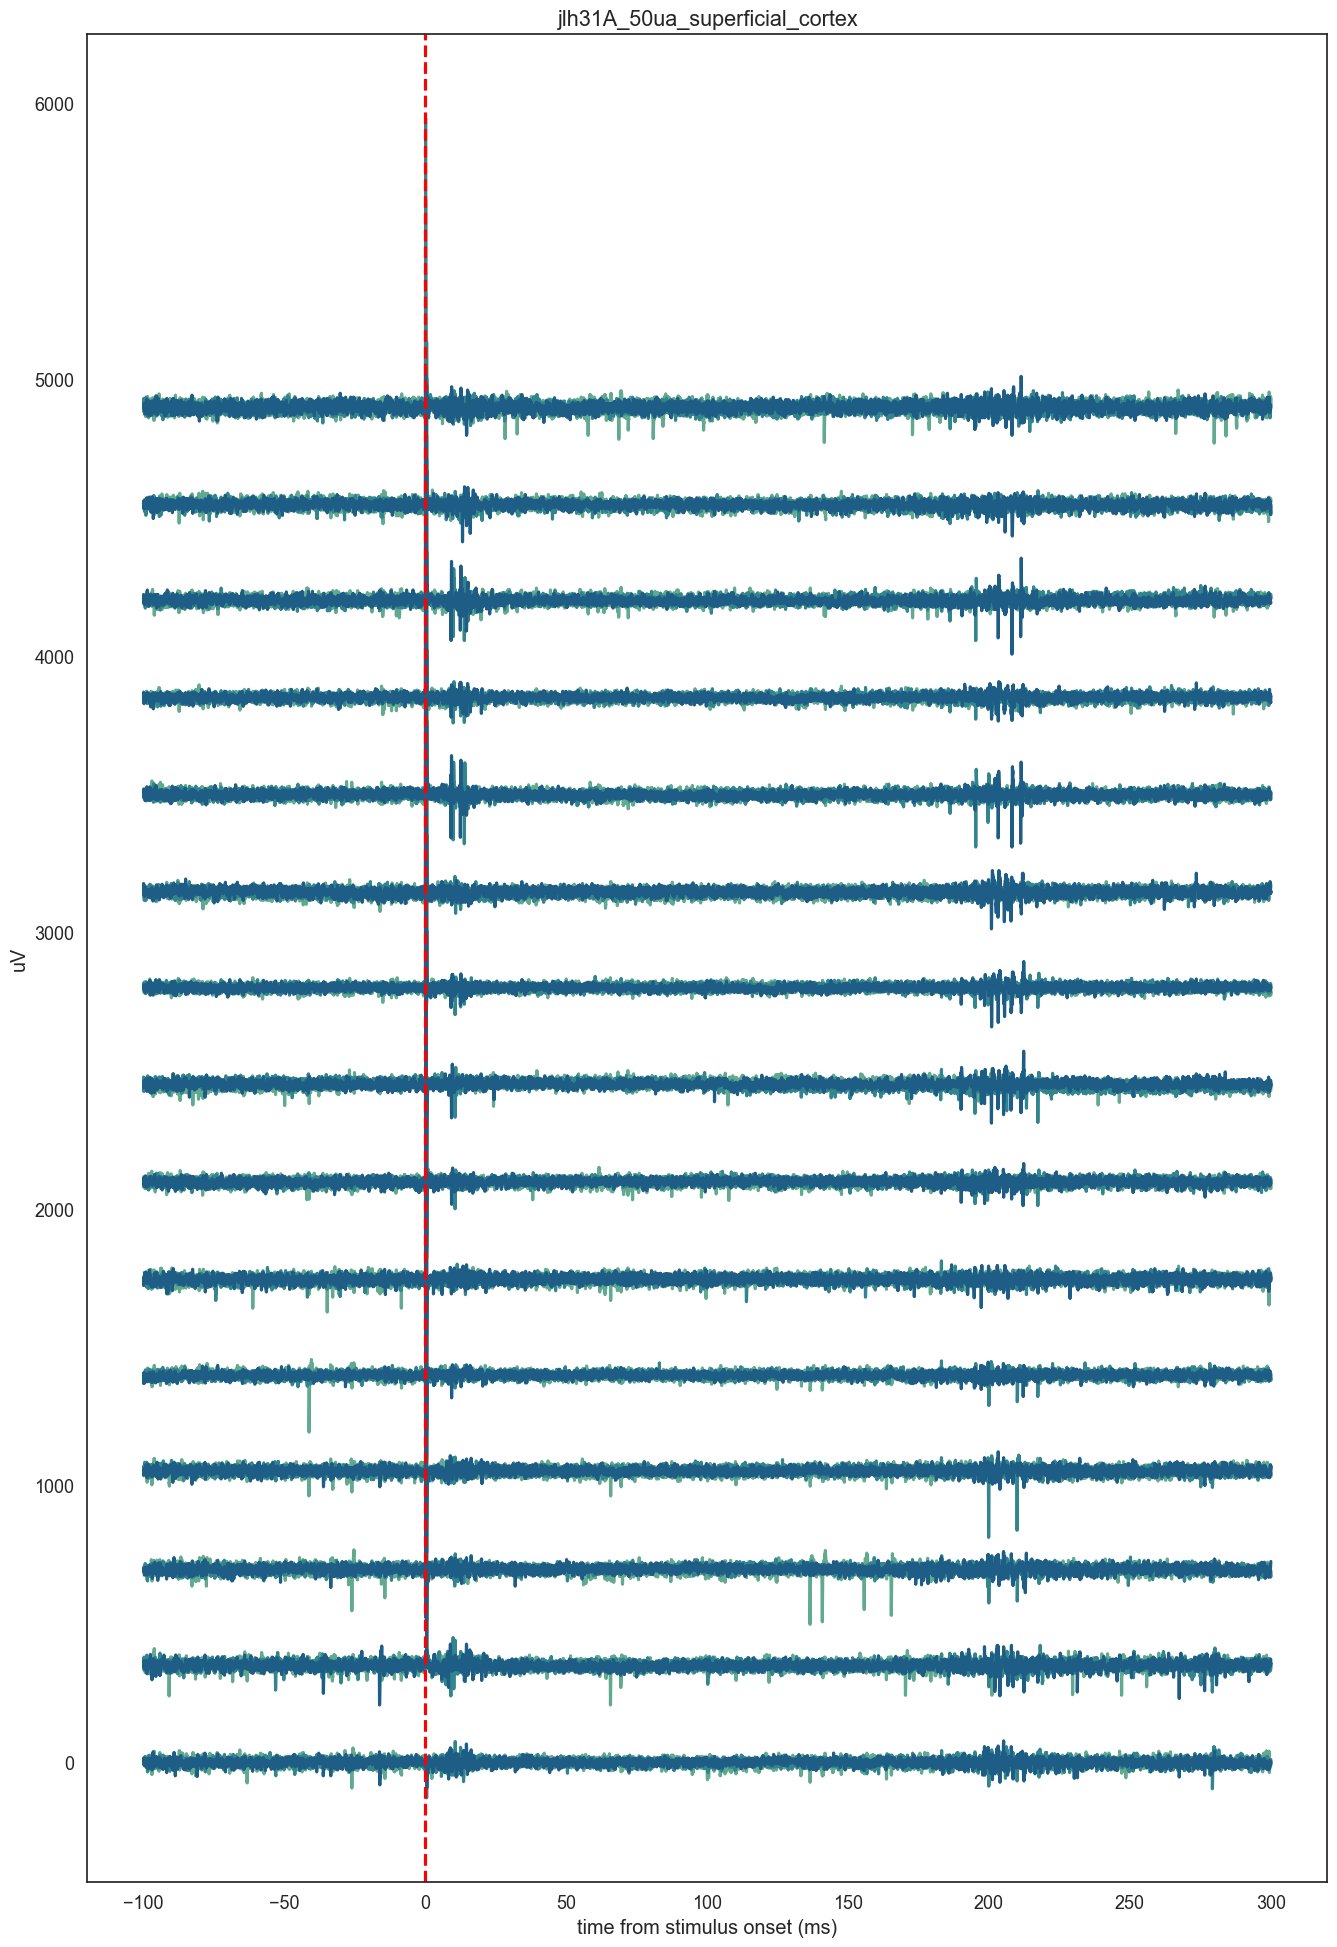

In [ ]:
#subcortical
title = 'jlh31A_50ua_ch24-30'
jlh31.raw.plot_ap('probeA', jlh31.trials[jlh31.trials.run == 4].start_time.values, pre = 100, post = 300,
                  first_ch = 24, last_ch = 30, n_trials = 3, median_subtraction = True,
                  title = title,
                  save = True, savepath = rf"C:\Users\jordan\Documents\combined_figs\ap_raw_traces_fig1\{title}.pdf", format = 'pdf')



## cc
title = 'jlh31A_50ua_cc'
jlh31.raw.plot_ap('probeA', jlh31.trials[jlh31.trials.run == 4].start_time.values, pre = 100, post = 300,
                  first_ch = 50+18, last_ch = 50+26, n_trials = 3, median_subtraction = True,
                  title = 'jlh31A_50ua_ch50-100',
                  save = True, savepath = rf"C:\Users\jordan\Documents\combined_figs\ap_raw_traces_fig1\{title}.pdf", format = 'pdf')

title = 'jlh31A_50ua_deepcortex'
jlh31.raw.plot_ap('probeA', jlh31.trials[jlh31.trials.run == 4].start_time.values, pre = 100, post = 300,
                  first_ch = 100, last_ch = 120, n_trials = 3, median_subtraction = True,
                  title = title,
                  save = True, savepath = rf"C:\Users\jordan\Documents\combined_figs\ap_raw_traces_fig1\{title}.pdf", format = 'pdf')


title = 'jlh31A_50ua_intermed_cortex'
jlh31.raw.plot_ap('probeA', jlh31.trials[jlh31.trials.run == 4].start_time.values, pre = 100, post = 300,
                  first_ch = 125, last_ch = 150, n_trials = 3, median_subtraction = True,
                  title = title,
                  save = True, savepath = rf"C:\Users\jordan\Documents\combined_figs\ap_raw_traces_fig1\{title}.pdf", format = 'pdf')

title = 'jlh31A_50ua_superficial_cortex'
jlh31.raw.plot_ap('probeA', jlh31.trials[jlh31.trials.run == 4].start_time.values, pre = 100, post = 300,
                  first_ch = 160, last_ch = 175, n_trials = 3, median_subtraction = True,
                  title = title,
                  save = True, savepath = rf"C:\Users\jordan\Documents\combined_figs\ap_raw_traces_fig1\{title}.pdf", format = 'pdf')


# gamma power alignment (Figure 1e)

In [94]:
from jlh_ephys.raw import load_datastream
from scipy.signal import welch
from scipy.ndimage import gaussian_filter1d
time_windows = [(300, 400), (300,400), (300, 400), 
                (540, 580),(100, 200), (0, 100), 
                (50, 150), (400,500), (50, 150)] # time windows preidentified for good lfp chunks
gamma_range=(30, 50)
freq_range=(0, 100)
fs=2500
gamma_power_list = []
gamma_power_smooth_list = []

for i, r in enumerate(recordings):
    print(f'Processing {r.mouse}')
    for probe in r.probes:
        chs_inserted = len(r.probe_coords[probe])
        chs_inserted_plussaline = chs_inserted + 50
        
        #print(f'Processing {probe}')
        if (r.mouse == 'jlh33') or (r.mouse == 'jlh40'):
            if probe == 'probeB':
                probe = 'probeA'  # probe A (per recording) is probe B by the geometry 
            if probe == 'probeC':
                probe = 'probeB' # probe B (per recording) is probe C by the geometry
                
        lfp_stream = load_datastream(r.path, probe, 'lfp')    
        lfp = lfp_stream.get_samples(start_sample_index = 2500 * time_windows[i][0], 
                                     end_sample_index = 2500 * time_windows[i][1], 
                                     selected_channels=np.arange(chs_inserted_plussaline))
        lfp = lfp - np.median(lfp, axis = 0) # offset correction 
        lfp_sub = (lfp.T - np.median(lfp[:,chs_inserted:chs_inserted_plussaline-1], axis = 1)).T # subtract saline portion of the recording 
        power_matrix = []
        
        for ch in range(lfp.shape[1]):
            ch_data = lfp[:, ch]
            f, Pxx = welch(ch_data, fs=fs)
            freq_mask = (f >= freq_range[0]) & (f <= freq_range[1])
            power_matrix.append(10 * np.log10(Pxx[freq_mask]))
        power_matrix = np.array(power_matrix)
        f_masked = f[freq_mask]
        
        # Extract gamma power
        gamma_mask = (f_masked >= gamma_range[0]) & (f_masked <= gamma_range[1])
        gamma_power = np.mean(power_matrix[:, gamma_mask], axis=1)
        gamma_power_smooth = gaussian_filter1d(gamma_power, sigma=2)
        
        # reverse gamma power so the surface is at the top 
        gamma_power_smooth = gamma_power_smooth[::-1]
        gamma_power_smooth_list.append(gamma_power_smooth)
        gamma_power_list.append(gamma_power[::-1])
        

Processing jlh31
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
confirming stream name: ProbeC-LFP
Processing jlh32
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
confirming stream name: ProbeC-LFP
Processing jlh33
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
Processing jlh34
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
confirming stream name: ProbeC-LFP
Processing jlh39
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
confirming stream name: ProbeC-LFP
Processing jlh40
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP


C:\Users\jordan\AppData\Local\Temp\ipykernel_22692\2253867078.py:38: RuntimeWarning: divide by zero encountered in log10
  power_matrix.append(10 * np.log10(Pxx[freq_mask]))


Processing jlh48
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
confirming stream name: ProbeC-LFP
Processing jlh49v1
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
confirming stream name: ProbeC-LFP
Processing jlh53concat
confirming stream name: ProbeA-LFP
confirming stream name: ProbeB-LFP
confirming stream name: ProbeC-LFP


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1127: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
C:\Users\jordan\AppData\Local\Temp\ipykernel_22692\4096614041.py:16: RuntimeWarning: Mean of empty slice
  mean_gamma = np.nanmean(padded_array, axis=0)
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 9 glyphs before
INFO:fontTools.subset:Glyph

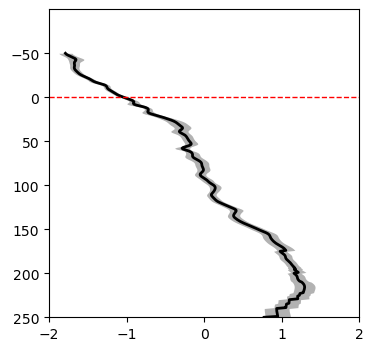

In [105]:
from scipy.stats import zscore

fig, ax = plt.subplots(figsize=(4, 4))

target_len = 380
chs = np.arange(-50, target_len - 50, 1)
# Pad each array with np.nan to length 300
normalized_list = [zscore(arr, nan_policy='omit') for arr in gamma_power_smooth_list]
padded_list = [np.pad(arr, (0, target_len - len(arr)), constant_values=np.nan) for arr in normalized_list]

#for i, gamma_power_smooth in enumerate(padded_list):
    #ax.plot(gamma_power_smooth, chs, linewidth = 0.75, color = 'gray', alpha = 0.3)
    
# Stack and compute nanmean and SEM
padded_array = np.vstack(padded_list)
mean_gamma = np.nanmean(padded_array, axis=0)
sem_gamma = np.nanstd(padded_array, axis=0) / np.sqrt(np.sum(~np.isnan(padded_array), axis=0))

# Plot mean
ax.plot(mean_gamma, chs, linewidth=2, color='black')

# Plot SEM as shaded error band
ax.fill_betweenx(
    chs,
    mean_gamma - sem_gamma,
    mean_gamma + sem_gamma,
    color='black',
    alpha=0.3,
    linewidth=0
)

# Styling
ax.set_yticks([-50, 0, 50, 100, 150, 200, 250, 300])
ax.set_ylim(-100, 250)
ax.set_xlim(-2, 2)
ax.invert_yaxis()
ax.axhline(0, color='red', linewidth=1, linestyle='--')

os.makedirs(fig1_path, exist_ok=True)
plt.savefig(os.path.join(fig1_path, 'gamma_power_alignment.pdf'), bbox_inches='tight')


c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1127: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
C:\Users\jordan\AppData\Local\Temp\ipykernel_22692\3960359598.py:16: RuntimeWarning: Mean of empty slice
  mean_gamma = np.nanmean(padded_array, axis=0)
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 9 glyphs before
INFO:fontTools.subset:Glyph

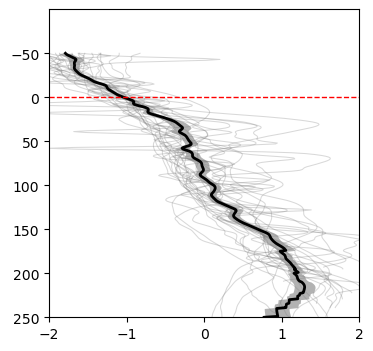

In [106]:
from scipy.stats import zscore

fig, ax = plt.subplots(figsize=(4, 4))

target_len = 380
chs = np.arange(-50, target_len - 50, 1)
# Pad each array with np.nan to length 300
normalized_list = [zscore(arr, nan_policy='omit') for arr in gamma_power_smooth_list]
padded_list = [np.pad(arr, (0, target_len - len(arr)), constant_values=np.nan) for arr in normalized_list]

for i, gamma_power_smooth in enumerate(padded_list):
    ax.plot(gamma_power_smooth, chs, linewidth = 0.75, color = 'gray', alpha = 0.3)
    
# Stack and compute nanmean and SEM
padded_array = np.vstack(padded_list)
mean_gamma = np.nanmean(padded_array, axis=0)
sem_gamma = np.nanstd(padded_array, axis=0) / np.sqrt(np.sum(~np.isnan(padded_array), axis=0))

# Plot mean
ax.plot(mean_gamma, chs, linewidth=2, color='black')

# Plot SEM as shaded error band
ax.fill_betweenx(
    chs,
    mean_gamma - sem_gamma,
    mean_gamma + sem_gamma,
    color='black',
    alpha=0.3,
    linewidth=0
)

# Styling
ax.set_yticks([-50, 0, 50, 100, 150, 200, 250, 300])
ax.set_ylim(-100, 250)
ax.set_xlim(-2, 2)
ax.invert_yaxis()
ax.axhline(0, color='red', linewidth=1, linestyle='--')

os.makedirs(fig1_path, exist_ok=True)
plt.savefig(os.path.join(fig1_path, 'gamma_power_alignment_n_lines.pdf'), bbox_inches='tight')


# probe and stim coords 2D ccf coords (Figure 1g)

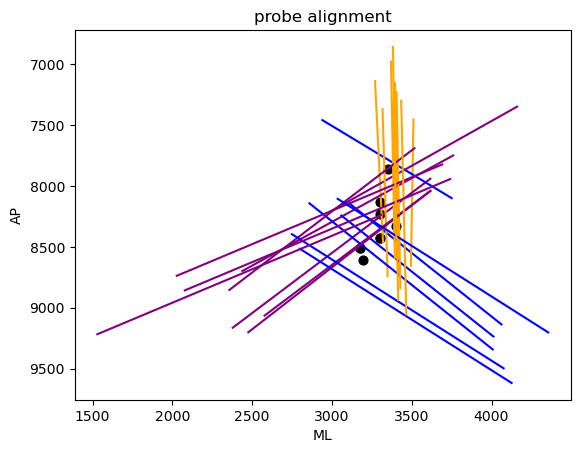

In [4]:
# plot them together
s = 8
fig, ax = plt.subplots()
for r in recordings:
    try:
        A_coords = r.probe_coords['probeA']
        plot_A = True
    except:
        plot_A = False
    B_coords = r.probe_coords['probeB']
    C_coords = r.probe_coords['probeC']
    stim_coords = r.stim_coords
    
    # Plot with gradient
    if plot_A:
        scatter_A = ax.plot([A_coords[0, 2],A_coords[-1,2]], [A_coords[0, 0],A_coords[-1,0]], label='ProbeA',
                        c = 'blue')
                        #c=range(len(A_coords[::4, 0])), cmap='Blues')

    scatter_B = ax.plot([B_coords[0, 2],B_coords[-1,2]], [B_coords[0, 0],B_coords[-1,0]], label = 'ProbeB',  
                           c = 'orange')
                           #c=range(len(B_coords[::4, 0])), cmap='Reds')

    scatter_C = ax.plot([C_coords[0, 2],C_coords[-1,2]], [C_coords[0, 0],C_coords[-1,0]], label = 'ProbeC', 
                           c = 'purple')
                           #c=range(len(C_coords[::4, 0])), cmap='Greens')

    # Highlight the stimulation point
    ax.scatter(stim_coords[-1, 2], stim_coords[-1, 0], color='k', s=40, label='Stim')

# Axis labels and legend
ax.set_title(f'probe alignment')
ax.set_xlabel('ML')
ax.set_ylabel('AP')
ax.invert_yaxis()
#ax.legend()

path = os.path.join(r"C:\Users\jordan\Documents\combined_figs", 'probe_tracks')
if not os.path.exists(path):
    os.makedirs(path)
#fig.savefig(os.path.join(path, 'probe_alignment_all_line.png'))
#fig.savefig(os.path.join(path, 'probe_alignment_all_line.pdf'))

# stim depths plot (find this! prolly in a random notebook) (Figure 1i)

In [3]:
first = []
all = []
for r in recordings:
    unique_contacts = r.trials.contact_negative.unique()
    for cont in unique_contacts:
        coord = r.trials[r.trials.contact_negative == cont].contact_negative_coords.values[0]
        depth = coord[1]
        all.append(depth)
    first_coord = r.trials[r.trials.contact_negative == unique_contacts[0]].contact_negative_coords.values[0]
    first_depth = first_coord[1]    
    first.append(first_depth)

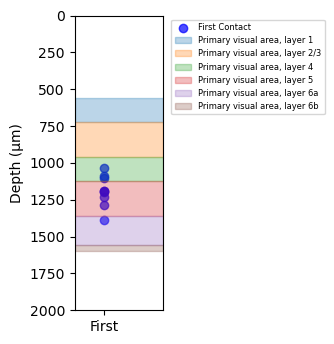

In [ ]:
depths = np.array([0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800,
                   840, 880, 920, 960, 1000, 1040, 1080, 1120, 1160, 1200, 1240, 1280, 1320, 1360, 1400, 1440, 1480,
                   1520, 1560, 1600, 1640, 1680, 1720, 1760, 1800, 1840, 1880, 1920, 1960])

labels = ['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
          'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
          'Primary visual area, layer 1', 'Primary visual area, layer 1',
          'Primary visual area, layer 1', 'Primary visual area, layer 1',
          'Primary visual area, layer 2/3', 'Primary visual area, layer 2/3',
          'Primary visual area, layer 2/3', 'Primary visual area, layer 2/3',
          'Primary visual area, layer 2/3', 'Primary visual area, layer 2/3',
          'Primary visual area, layer 4', 'Primary visual area, layer 4',
          'Primary visual area, layer 4', 'Primary visual area, layer 4',
          'Primary visual area, layer 5', 'Primary visual area, layer 5',
          'Primary visual area, layer 5', 'Primary visual area, layer 5',
          'Primary visual area, layer 5', 'Primary visual area, layer 5',
          'Primary visual area, layer 6a', 'Primary visual area, layer 6a',
          'Primary visual area, layer 6a', 'Primary visual area, layer 6a',
          'Primary visual area, layer 6a', 'Primary visual area, layer 6b',
          'optic radiation', 'optic radiation', 'corpus callosum, posterior forceps',
          'corpus callosum, posterior forceps', 'corpus callosum, posterior forceps',
          'Prosubiculum', 'Prosubiculum', 'Prosubiculum', 'Prosubiculum', 'Prosubiculum']


# labels are from the allen brain atlas 

# filter for primary visual cortex layers only
primary_layers = [(depths[i], labels[i]) for i in range(len(labels)) if 'Primary visual area' in labels[i]]

# get unique layers with their min and max depths
layer_bounds = {}
for depth, label in primary_layers:
    if label not in layer_bounds:
        layer_bounds[label] = [depth, depth]
    else:
        layer_bounds[label][1] = depth  # Update max depth

# scatter plot
fig = plt.figure(figsize=(3.54, 3.54))
plt.scatter(np.ones(len(first)), first, label='First Contact', color='blue', alpha=0.7)

# overlay shaded regions for layers
for i, (layer, (start, end)) in enumerate(layer_bounds.items()):
    plt.axhspan(start, end+40, color=f'C{i}', alpha=0.3, label=layer)  # +40 to cover full last depth increment

plt.ylabel('Depth (µm)', fontsize=10)
plt.xticks([1], ['First'], fontsize=10)
plt.xlim(0.9, 1.2)
plt.ylim(0, 2000)
plt.gca().invert_yaxis()

plt.legend(fontsize=6, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#plt.savefig(os.path.join(EP_path, 'stim_depths.png'))
#plt.savefig(os.path.join(EP_path, 'stim_depths.pdf'))


# contact impedance (figure 1j)

copied contact impedance from NN electrodes from contacts and electrodes used (spec sheets)

In [138]:
len(impeds)

83

0.10 ± 0.06 MΩ


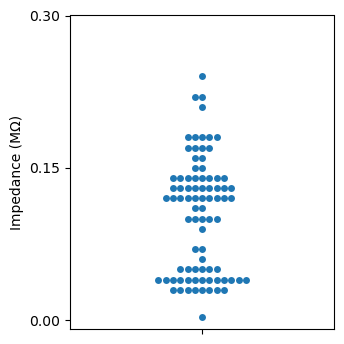

In [11]:
impeds = [0.09,0.1,0.1,
            0.18,0.1,0.12,0.12,0.13,0.13,
            0.14,0.13,0.12,0.14,0.13,0.12,
            0.14,0.12,0.18,0.1,0.14,0.13,
            0.14,0.12,0.12,0.13,0.13,0.12,
            0.12,0.17,0.14,0.18,0.18,0.15,
            0.12,0.16,0.17,0.22,0.17,0.22,
            0.13,0.21,0.11,0.11,0.1,0.13,
            0.17,0.14,0.18,0.15,0.14,0.24,
            0.03, .003, 0.04, 0.04,
            0.03, 0.04, 0.03, 0.04, 
            0.03, 0.04, 0.03, 0.03,
            0.03, 0.04, 0.03, 0.05,
            0.04, 0.04, 0.07, 0.05,
            0.07, 0.05, 0.05, 0.16,
            0.05, 0.04, 0.04, 0.04,
            0.05, 0.04, 0.04, 0.06
        ]

df = pd.DataFrame({'Impedance (MΩ)': impeds})

fig = plt.figure(figsize=(3.54, 3.54))
sns.swarmplot(y='Impedance (MΩ)', data=df)
plt.ylabel('Impedance (MΩ)', fontsize=10)
plt.xlabel('', fontsize=10)
plt.yticks([0, 0.15, 0.3])
plt.tight_layout()

#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\fig1_stuff\impedances.pdf')
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\fig1_stuff\impedances.png')

print(f'{np.mean(impeds):.2f} ± {np.std(impeds):.2f} MΩ')

# charge capacity (figure 1j)

25.90 ± 9.69 mC/cm2


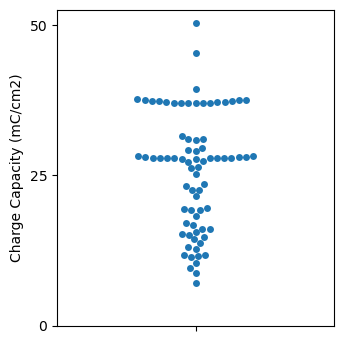

In [ ]:
# copied from nn spec sheets 
charge_cap = [
    23.31, 26.47, 16.72,
    23.52, 29.57, 19.2, 9.57, 19.2,
    29.3, 31.57, 29.14, 8.77,
    17.06, 16.0, 27.35, 10.45,
    50.38, 19.59, 14.71, 15.3,
    15.62, 12.8, 26.17, 11.52,
    22.58,  11.8, 7.09, 15.14,
    14.34,  39.4, 37.10,
    22.62, 30.99, 21.58, 19.4,
    25.25, 16.12, 27.22, 30.84,
    30.99, 11.8, 18.28, 11.36, 13.08,
    13.7, 45.32, 28.25, 27.87,
    27.84, 27.82, 27.83, 27.80,
    27.78, 28.16, 28.13, 28.11,
    28.06, 27.97, 27.95, 27.95,
    27.90, 37.66, 37.18, 37.12, 
    37.06, 37.05, 37.03, 37.00,
    37.63, 37.57, 37.49, 37.44,
    37.39, 37.31, 37.27, 37.24
]

df = pd.DataFrame({'Charge Capacity (mC/cm2)': charge_cap})

# Plot
fig = plt.figure(figsize=(3.54, 3.54))
sns.swarmplot(y='Charge Capacity (mC/cm2)', data=df)
plt.ylabel('Charge Capacity (mC/cm2)', fontsize=10)
plt.xlabel('', fontsize=10)
plt.yticks([0, 25, 50])
plt.tight_layout()

#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\fig1_stuff\charge_cap.pdf')
#plt.savefig(r'C:\Users\jordan\Documents\combined_figs\fig1_stuff\charge_cap.png')

print(f'{np.mean(charge_cap):.2f} ± {np.std(charge_cap):.2f} mC/cm2')

# charge density conversions (figure 1k)

In [ ]:
area_cm2 = 7.03e-6 # from nn spec sheets (area in cm^2) 
pulse_width_s = 100e-6 # pulse width in seconds
currents_uA = np.array([5, 25, 50, 100])

charge_density = (currents_uA * pulse_width_s) / area_cm2
charge_density # uA*sec/cm^2 

array([  71.12375533,  355.61877667,  711.23755334, 1422.47510669])

# saturation duration (figure l)

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 38 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.nul

confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 38 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 38 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:maxp pruned


confirming stream name: ProbeB-AP


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 

confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 38 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned


confirming stream name: ProbeA-AP


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 38 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'fiv

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:maxp pruned


confirming stream name: ProbeB-AP


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 40 glyphs after
INFO:fontTools.subset:Glyph names: ['.no

confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


C:\Users\jordan\AppData\Local\Temp\ipykernel_52212\1505848887.py:37: RuntimeWarning: Mean of empty slice.
  mean_per_ch = counts_tc.mean(axis=0)
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\jordan\AppData\Local\Temp\ipykernel_52212\1505848887.py:43: RuntimeWarning: Mean of empty slice.
  mean_sat = counts_tc_clean.mean(axis=0) * (1 / 30_000) * 1000  # ms
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\_core\_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
IN

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 36 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 28, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH': 42 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 

confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 35 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 28, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH': 41 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned


confirming stream name: ProbeA-AP
Error aligning data for jlh40 -- probeA at -100 uA


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:maxp pruned


confirming stream name: ProbeB-AP


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', '

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 27, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 40 glyphs after
INFO:fontTools.subset:Glyph names: [

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 35 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 27, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 41 glyphs after
INFO:fontTools.subset:Glyph

confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 27, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 40 glyphs after
INFO:fontTools.subset:Glyph names: [

confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned


confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 35 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'two', 'u', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 28, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH': 41 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'fi

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 36 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'two', 'u', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 28, 36, 37, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH': 42 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.nu

confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP


INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 35 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'two', 'u', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 28, 36, 38, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 3228]
INFO:fontTools.subset:Closed glyph list over 'MATH': 41 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'd', 'e', 'f', 'fi

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 38, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.nul

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 34 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 37, 38, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 40 glyphs after
INFO:fontTools.subset:Glyph names: ['.notde

confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP


INFO:fontTools.subset:maxp pruned


confirming stream name: ProbeC-AP
Error aligning data for jlh53concat -- probeC at -100 uA


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 36, 38, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'MATH': 39 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'a', 'b', 'c', 'd', 

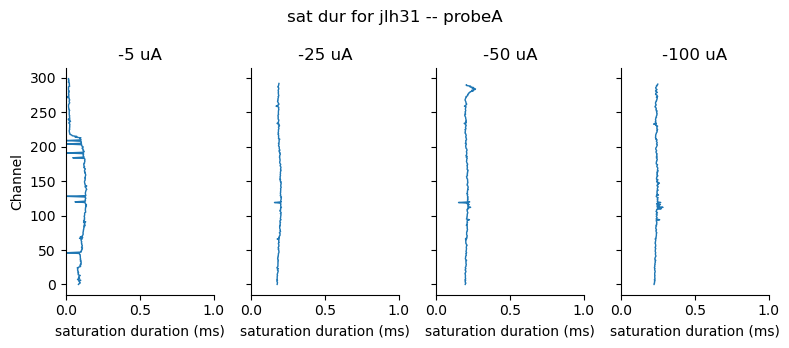

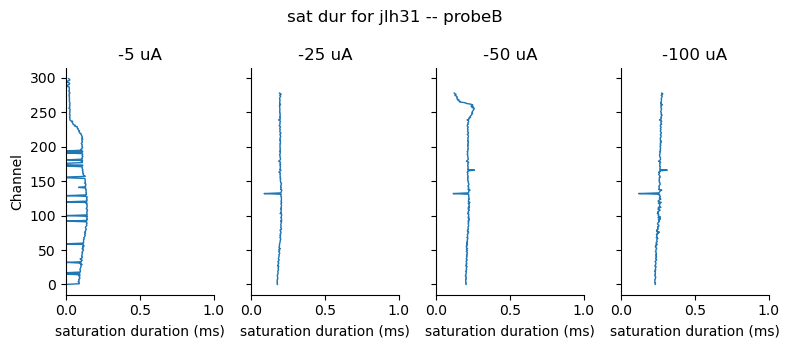

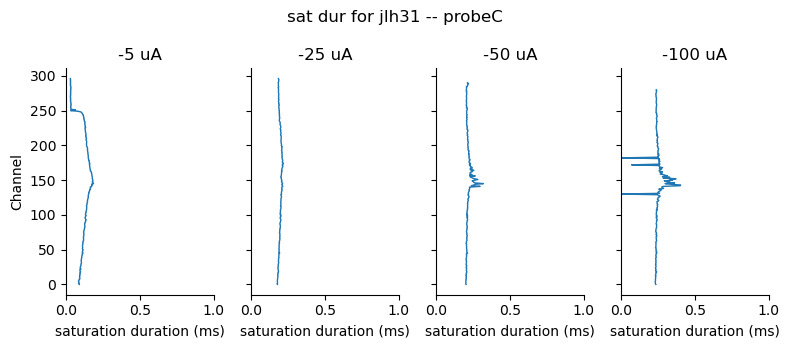

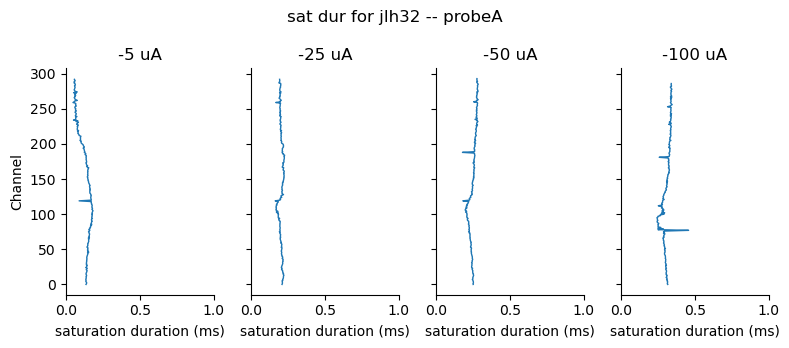

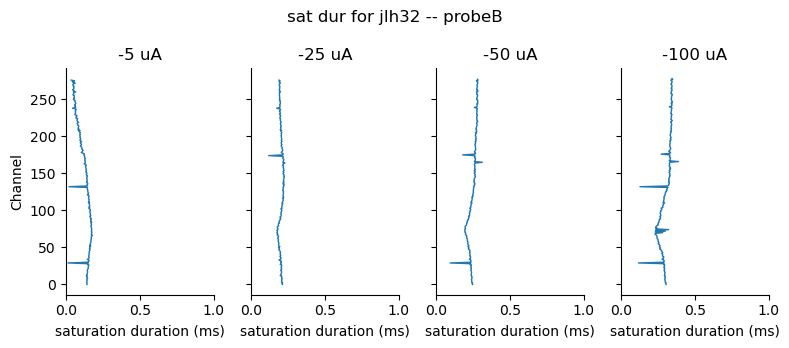

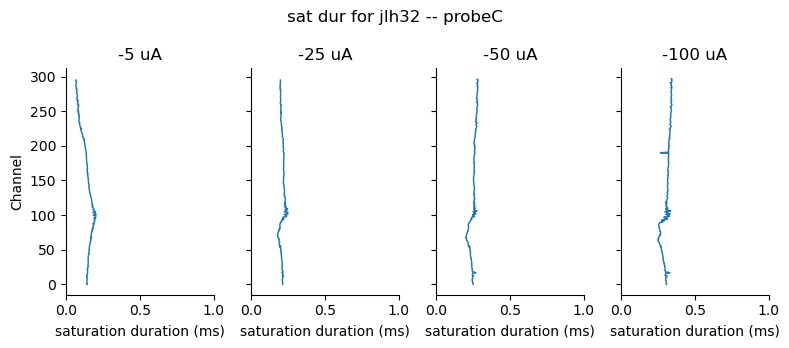

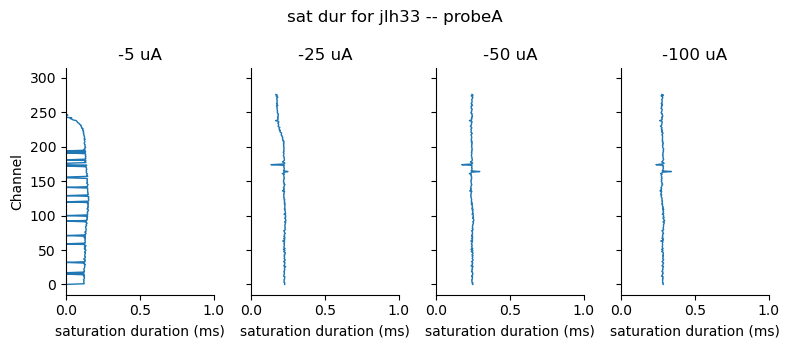

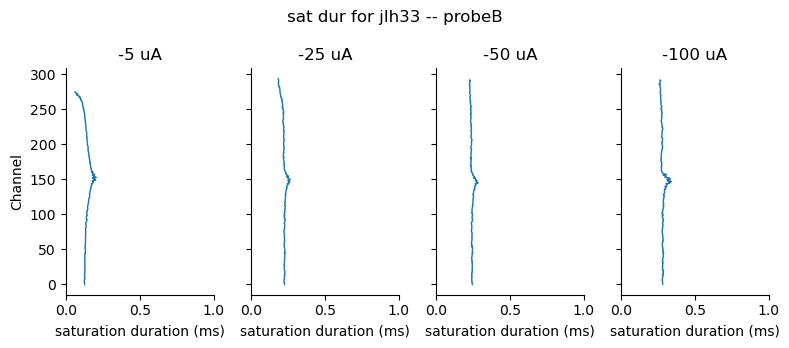

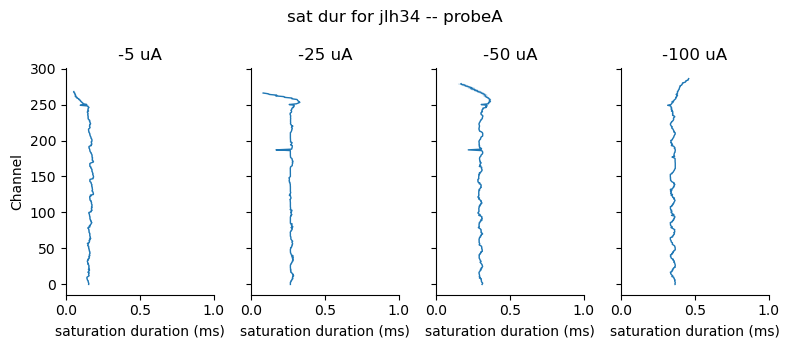

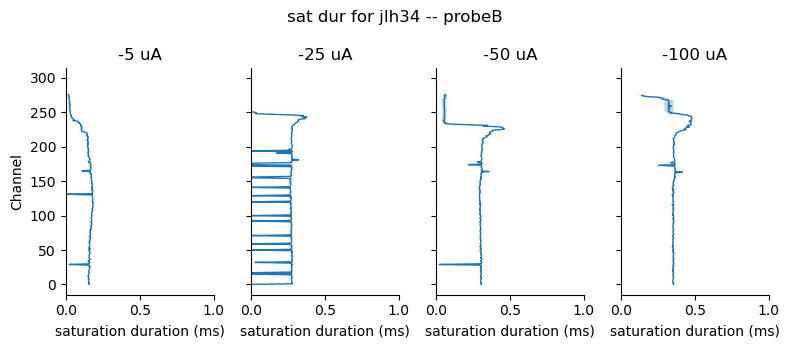

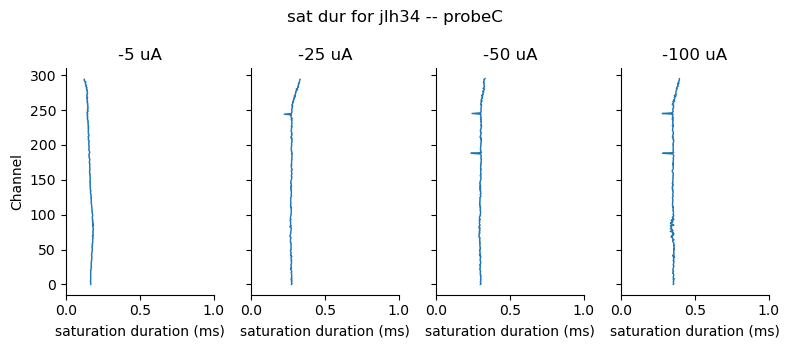

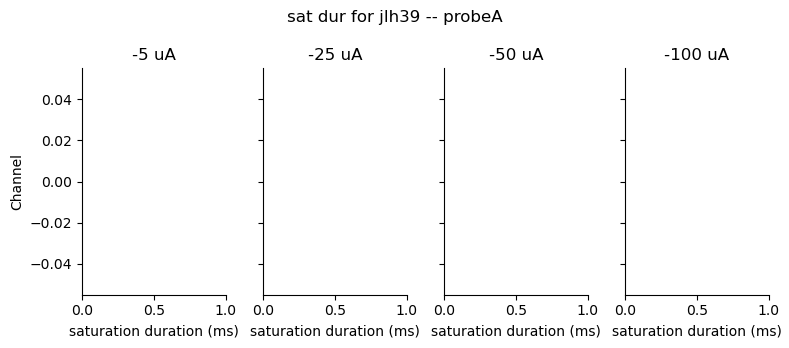

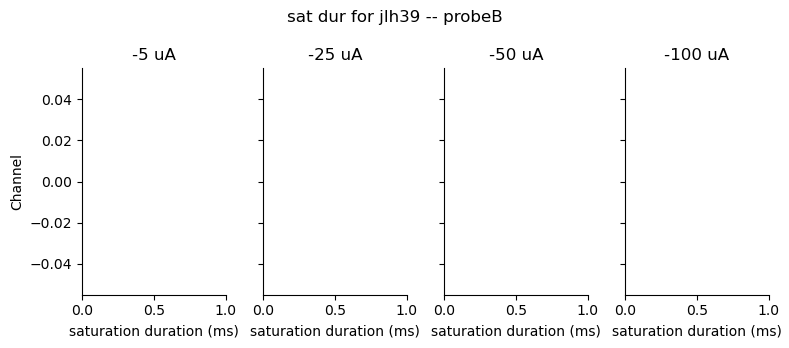

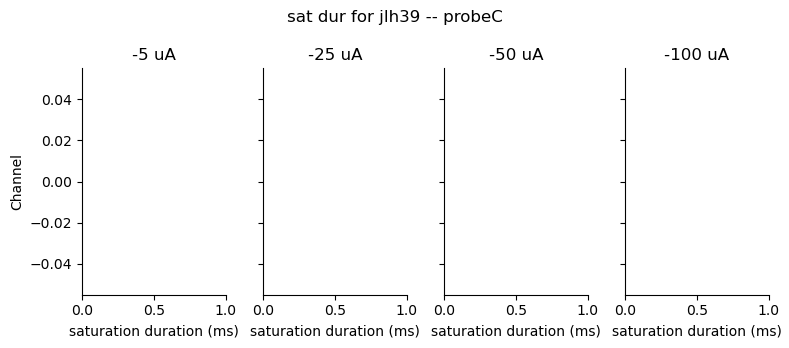

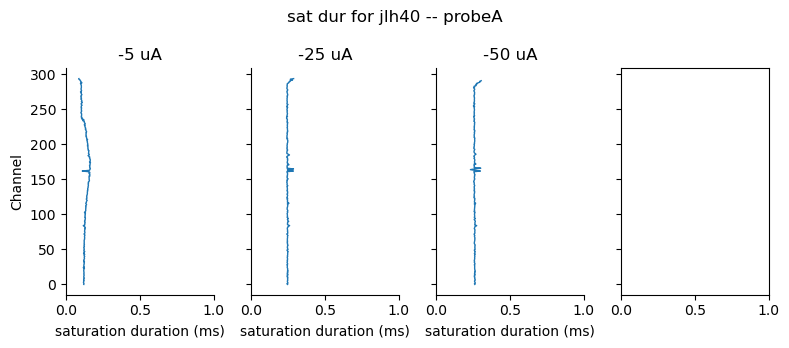

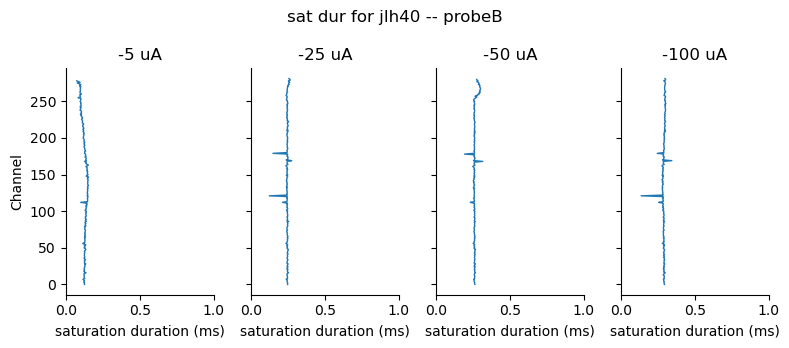

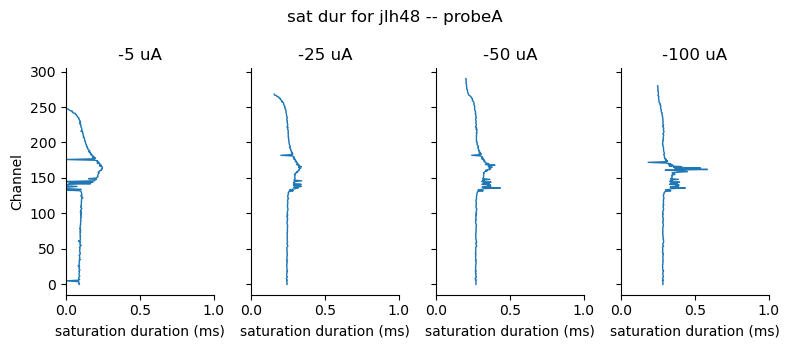

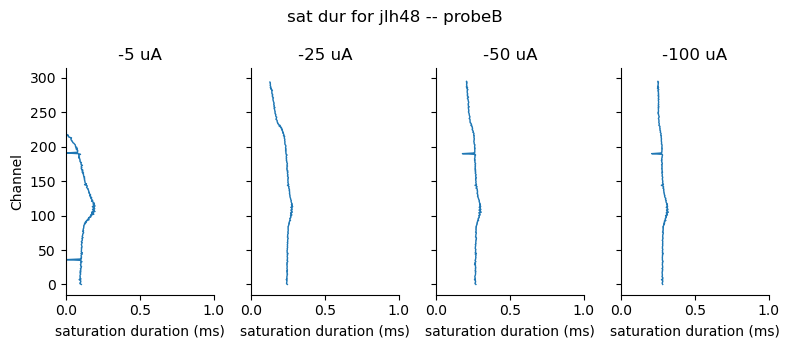

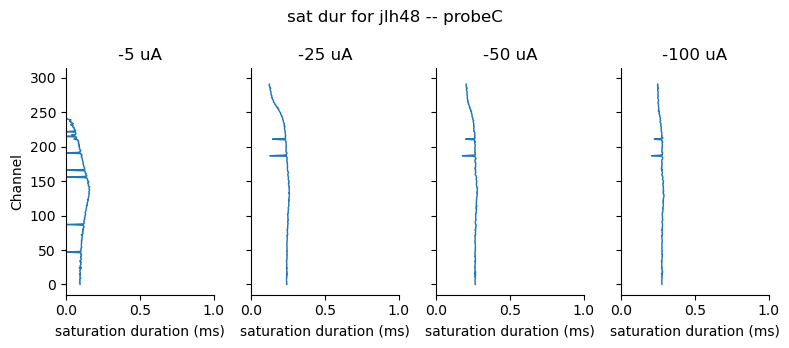

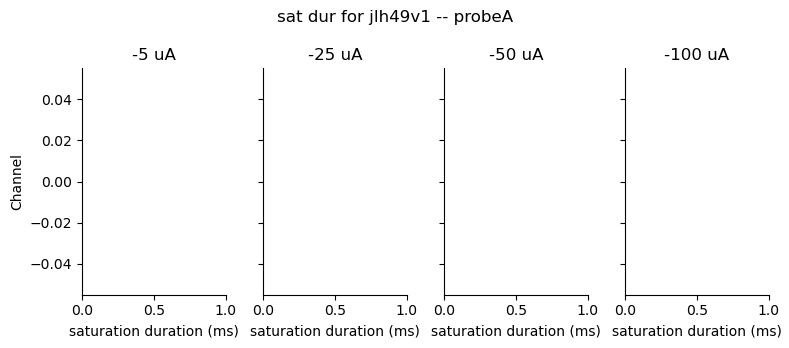

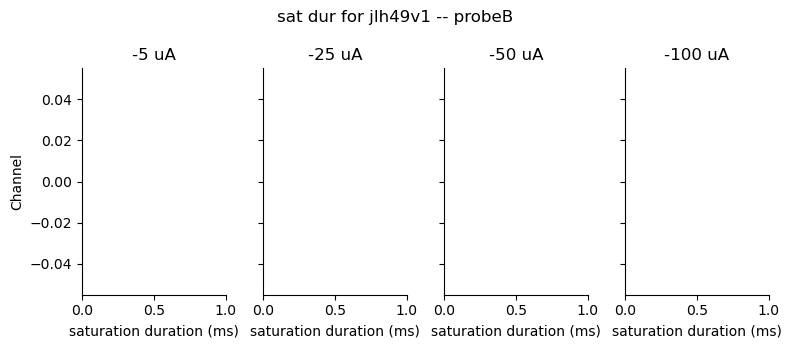

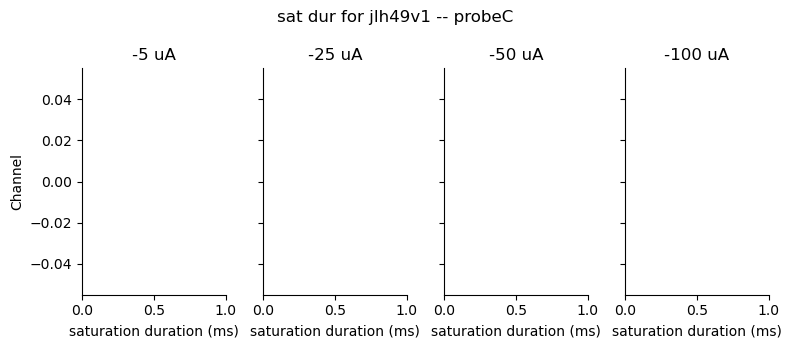

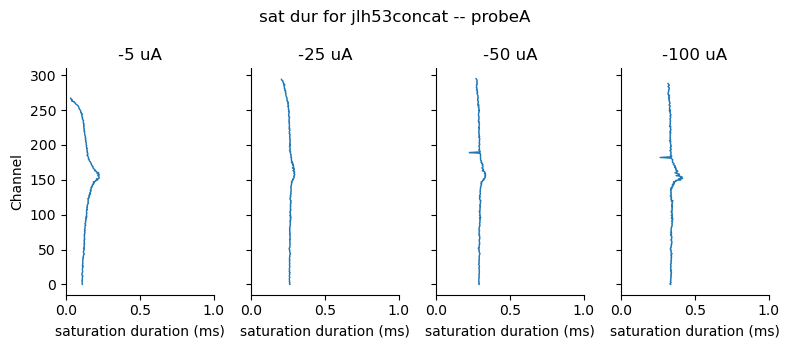

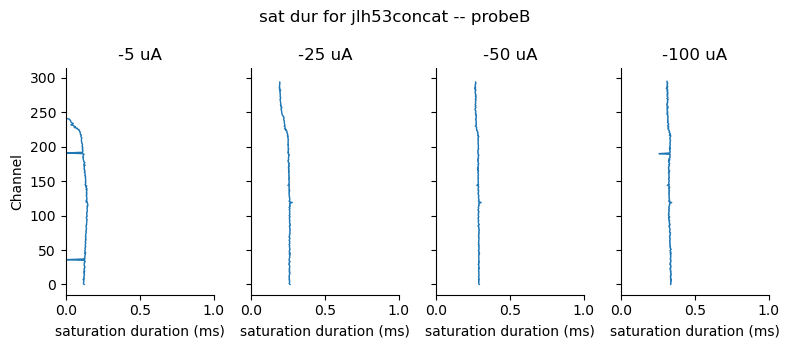

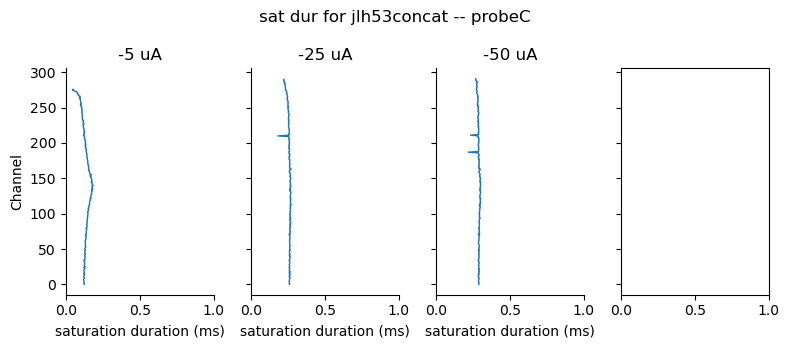

In [ ]:
# individual recordings
# --- parameters ---
pre = 3 
post = 3
thr = 1100

for r in recordings: 
    for probe in r.probes:

        if r.mouse == 'jlh33':
            if probe == 'probeB':
                probe = 'probeA'
            elif probe == 'probeC':
                probe = 'probeB'
        if r.mouse == 'jlh40':
            if probe == 'probeB':
                probe = 'probeA'
            elif probe == 'probeC':
                probe = 'probeB'
        fig, ax = plt.subplots(1, 4, figsize=(8, 3.5), sharey=True)

        for i, amp in enumerate([-5, -25, -50, -100]):
            stim_times = choose_stim_parameter(r.trials, amp=amp, polarity='monopolar') 
            if len(stim_times) > 75:
                stim_times = stim_times[:75]
                
            chunk = r.raw.get_chunk(probe, stim_times, band='ap', pre=pre+2, post=post+2, chs=np.arange(0, 300))
            try:
                aligned_chunk = align_data(chunk, pre=pre, post=post, channels=300)
            except:
                print(f'Error aligning data for {r.mouse} -- {probe} at {amp} uA')
                continue
            # --- compute saturation ---
            sat_mask = aligned_chunk > thr
            counts_tc = sat_mask.sum(axis=1)  # shape: (trials, channels)
            
            # --- identify and remove outlier channels ---
            mean_per_ch = counts_tc.mean(axis=0)
            z = np.abs((mean_per_ch - mean_per_ch.mean()) / mean_per_ch.std(ddof=1))
            keep_mask = z < 2  # boolean mask of non-outlier channels
            counts_tc_clean = counts_tc[:, keep_mask]

            # --- mean ± SEM ---
            mean_sat = counts_tc_clean.mean(axis=0) * (1 / 30_000) * 1000  # ms
            sem_sat  = counts_tc_clean.std(axis=0, ddof=1) / np.sqrt(counts_tc_clean.shape[0])
            sem_sat *= (1 / 30_000) * 1000  # ms

            chs = np.arange(len(mean_sat))
            ax[i].plot(mean_sat, chs, lw=1)
            ax[i].fill_betweenx(chs, mean_sat - sem_sat, mean_sat + sem_sat, alpha=0.3)

            ax[i].set_xlabel('saturation duration (ms)')
            ax[i].spines[['top', 'right']].set_visible(False)
            ax[i].set_title(f'{amp} uA')
            ax[i].set_xlim(0, 1)
            ax[i].set_xticks([0, 0.5, 1])
        ax[0].set_ylabel('Channel')
        plt.suptitle(f'sat dur for {r.mouse} -- {probe}')
        plt.tight_layout()
        save_folder = os.path.join(fig1_path, 'saturation_duration')
        os.makedirs(save_folder, exist_ok=True)
        
        #plt.savefig(os.path.join(save_folder, f'sat_dur_{r.mouse}_{probe}.pdf'))
        #plt.savefig(os.path.join(save_folder, f'sat_dur_{r.mouse}_{probe}.png'))


In [9]:
distances = {}
distances_norm = {}

for r in recordings:
    contact = r.trials.contact_negative[0]
    distances[r.mouse] = r.get_dists(contact)
    
    temp_norm_dist = {}
    for probe, dists in r.distances.items():
        # normalize min dist to 0 
        min = np.min(dists)
        dists_norm = dists - min
        
        
        # make prior to crossing point negative and after positive
        cross_index = np.where(dists_norm == 0)[0][0]  # this gives the first index where data is non-positive
        dists_norm[cross_index:] = -np.abs(dists_norm[cross_index:])
        temp_norm_dist[probe] = dists_norm

        dists[cross_index:] = -np.abs(dists[cross_index:])
        r.distances[probe] = dists
    
    distances_norm[r.mouse] = temp_norm_dist

confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP


C:\Users\jordan\AppData\Local\Temp\ipykernel_44240\1552962570.py:61: RuntimeWarning: Mean of empty slice.
  mean_per_ch = counts_tc.mean(axis=0)
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\jordan\AppData\Local\Temp\ipykernel_44240\1552962570.py:68: RuntimeWarning: Mean of empty slice.
  mean_sat = counts_tc.mean(axis=0) * (1 / 30_000) * 1000
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\_core\_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\_core\_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\jordan\AppData\Local\anaconda3\Lib\site-packages\numpy\_core\_methods.py:212: RuntimeWarning: invalid value encountered in divide

confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeA-AP
confirming str

C:\Users\jordan\AppData\Local\Temp\ipykernel_44240\1552962570.py:117: RuntimeWarning: Mean of empty slice
  amp_vals.append(np.nanmean(interp_vals))


confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
confirming stream name: ProbeB-AP
confirming str

C:\Users\jordan\AppData\Local\Temp\ipykernel_44240\1552962570.py:125: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(mean_mat, axis=0)


These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeA-AP
These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeA-AP
confirming stream name: ProbeA-AP
These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeB-AP
These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeB-AP
These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeB-AP
confirming stream name: ProbeB-AP
These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeC-AP
These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeC-AP
These are the multiple unique cathodal [16 10]
Returning the first one: 16
confirming stream name: ProbeC-AP
confirming stream name: ProbeC-AP
confirming stream name: Pr

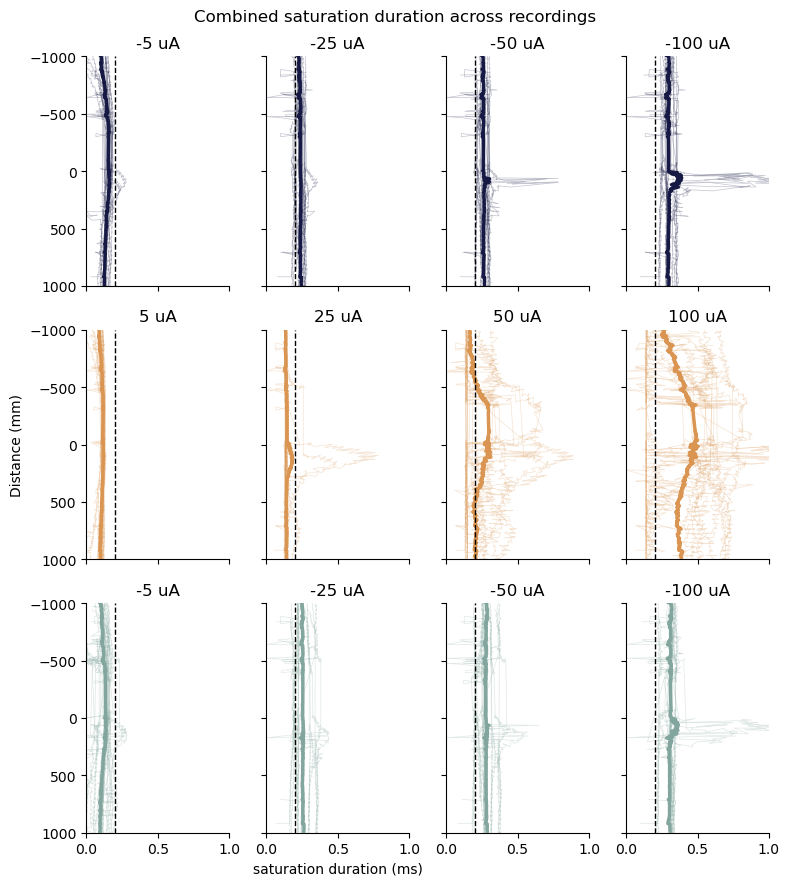

In [10]:
# by polarity and averages
from scipy.stats import binned_statistic
# --- parameters ---
pre = 3 
post = 3
thr = 1100

fig, ax = plt.subplots(3, 4, figsize=(8, 9), sharey=True, sharex=True)
polarity_avg_sat = {}

for pol in ['anodal', 'cathodal', 'bipolar']:
    if pol == 'anodal':
        amps = [5, 25, 50, 100]
        polarity = 'monopolar'
        row = 1
        color = anodal_color
    elif pol == 'cathodal':
        amps = [-5, -25, -50, -100]
        polarity = 'monopolar'
        row = 0
        color = cathodal_color
    elif pol == 'bipolar':
        amps = [-5, -25, -50, -100]
        polarity = 'bipolar'
        row = 2
        color = bipolar_color
    
    # For averaging: collect all mean_sat/d pairs for each amp index
    all_means_by_amp = [[] for _ in range(4)]  # assuming 4 amps
    all_dists_by_amp = [[] for _ in range(4)]

    for r in recordings:
        for probe in r.probes:
            d = distances[r.mouse][probe] - 200
            if r.mouse == 'jlh33':
                if probe == 'probeB':
                    probe = 'probeA'
                elif probe == 'probeC':
                    probe = 'probeB'
            if r.mouse == 'jlh40':
                if probe == 'probeB':
                    probe = 'probeA'
                elif probe == 'probeC':
                    probe = 'probeB'

            for i, amp in enumerate(amps):
                stim_times = choose_stim_parameter(r.trials, amp=amp, polarity=polarity)
                if len(stim_times) > 75:
                    stim_times = stim_times[:75]

                chunk = r.raw.get_chunk(probe, stim_times, band='ap', pre=pre+2, post=post+2, chs=np.arange(0, len(d)))
                try:
                    aligned_chunk = align_data(chunk, pre=pre, post=post, channels=len(d))
                except:
                    print(f'Error aligning data for {r.mouse} -- {probe} at {amp} uA')
                    continue

                sat_mask = aligned_chunk > thr
                counts_tc = sat_mask.sum(axis=1)

                mean_per_ch = counts_tc.mean(axis=0)
                z = np.abs((mean_per_ch - mean_per_ch.mean()) / mean_per_ch.std(ddof=1))
                outlier_mask = z >= 1
                counts_tc_padded = np.pad(counts_tc, ((0, 0), (1, 1)), mode='edge')
                for ch in np.where(outlier_mask)[0]:
                    counts_tc[:, ch] = 0.5 * (counts_tc_padded[:, ch] + counts_tc_padded[:, ch + 2])

                mean_sat = counts_tc.mean(axis=0) * (1 / 30_000) * 1000
                sem_sat  = counts_tc.std(axis=0, ddof=1) / np.sqrt(counts_tc.shape[0])
                sem_sat *= (1 / 30_000) * 1000

                # --- collect for average
                all_means_by_amp[i].append(mean_sat)
                all_dists_by_amp[i].append(d)

                chs = np.arange(len(mean_sat))
                # --- plotting: individual lines light gray
                ax[row, i].plot(mean_sat, d, lw=0.5, color=color, alpha = 0.25, zorder=1)
                #ax[i].fill_betweenx(d, mean_sat - sem_sat, mean_sat + sem_sat, alpha=0.15, color='lightgray', zorder=1)

                #ax[row, i].set_xlabel('saturation duration (ms)')
                ax[row,i].spines[['top', 'right']].set_visible(False)
                ax[row,i].set_title(f'{amp} uA')
                ax[row,i].set_xlim(0, 1)
                ax[row,i].set_xticks([0, 0.5, 1])
                ax[row,i].yaxis.set_inverted(True)
            

    

    avg_sat_by_amp = []
    sem_sat_by_amp = []
    per_recording_vals = []  

    for i in range(4):
        all_d = np.concatenate(all_dists_by_amp[i])
        step_size = 1
        N = int((np.max(all_d) - np.min(all_d)) / step_size) + 1
        grid_d = np.linspace(np.min(all_d), np.max(all_d), N)

        mean_mat = np.full((len(all_means_by_amp[i]), len(grid_d)), np.nan)
        amp_vals = []  

        for j, (mean_sat, d) in enumerate(zip(all_means_by_amp[i], all_dists_by_amp[i])):
            sort_idx = np.argsort(d)
            d_sorted = np.array(d)[sort_idx]
            mean_sat_sorted = np.array(mean_sat)[sort_idx]

            d_unique, unique_idx = np.unique(d_sorted, return_index=True)
            mean_sat_unique = mean_sat_sorted[unique_idx]

            mask = (grid_d >= d_unique.min()) & (grid_d <= d_unique.max())
            interp_vals = np.interp(grid_d[mask], d_unique, mean_sat_unique)
            mean_mat[j, mask] = interp_vals

            # Store per-recording mean
            amp_vals.append(np.nanmean(interp_vals))

        # Store per-recording values and summary stats
        per_recording_vals.append(amp_vals)
        avg_sat_by_amp.append(np.nanmean(amp_vals))
        sem_sat_by_amp.append(np.nanstd(amp_vals) / np.sqrt(len(amp_vals)))

        # Plot
        avg = np.nanmean(mean_mat, axis=0)
        ax[row, i].plot(avg, grid_d, color=color, lw=2.5, zorder=3, label='Average')
        ax[row, i].axvline(0.2, color='black', ls='--', lw=1, zorder=4, label='pulse duration')
        ax[row, i].set_ylim(-1000, 1000)
        ax[row, i].set_yticks([-1000, -500, 0, 500, 1000])
        ax[row, i].yaxis.set_inverted(True)
    
    polarity_avg_sat[pol] = {
        'amps': amps,
        'mean': np.array(avg_sat_by_amp),
        'sem': np.array(sem_sat_by_amp),
        'color': color,
        'per_recording': per_recording_vals  
    }
ax[2, 1].set_xlabel('saturation duration (ms)')
ax[1, 0].set_ylabel('Distance (mm)')
plt.suptitle(f'Combined saturation duration across recordings')
plt.tight_layout()
save_folder = os.path.join(fig1_path, 'saturation_duration')
os.makedirs(save_folder, exist_ok=True)
#plt.savefig(os.path.join(save_folder, f'sat_dur_combined_dists.pdf'))
#plt.savefig(os.path.join(save_folder, f'sat_dur_combined_dists.png'))

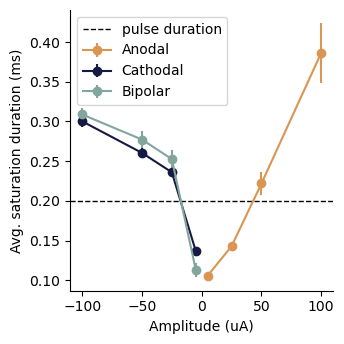

In [11]:
fig = plt.figure(figsize=(3.54, 3.54))
ax = fig.add_subplot(1,1,1)
for pol in polarity_avg_sat:
    ax.errorbar(
        polarity_avg_sat[pol]['amps'],
        polarity_avg_sat[pol]['mean'],
        yerr=polarity_avg_sat[pol]['sem'],
        fmt='o-',
        color=polarity_avg_sat[pol]['color'],
        label=pol.capitalize()
    )
ax.axhline(0.2, color='black', ls='--', lw=1, label='pulse duration')
ax.set_xlabel('Amplitude (uA)')
ax.set_ylabel('Avg. saturation duration (ms)')
ax.spines[['top', 'right']].set_visible(False)
ax.legend()
plt.tight_layout()
save_folder = os.path.join(r'C:\Users\jordan\Documents\combined_figs\fig1_stuff', 'saturation_duration')
#plt.savefig(os.path.join(save_folder, 'sat_dur_avg_by_amp.pdf'))
#plt.savefig(os.path.join(save_folder, 'sat_dur_avg_by_amp.png'))



In [12]:
# 1-way ANOVA for cathodal polarity saturation durations across amps 
from scipy.stats import f_oneway

# Get cathodal per-recording values for each amp
cathodal_data = polarity_avg_sat['cathodal']['per_recording']
cathodal_data_clean = [np.array(vals)[~np.isnan(vals)] for vals in polarity_avg_sat['cathodal']['per_recording']]

fval, pval = f_oneway(*cathodal_data_clean)

print(fval, pval)
print([len(vals) for vals in cathodal_data_clean])
print([f"{np.mean(vals):.2f} ± {np.std(vals, ddof=1)/np.sqrt(len(vals)):.2f}" for vals in cathodal_data_clean])

105.62723961896265 6.313620299824886e-26
[19, 19, 19, 17]
['0.14 ± 0.00', '0.24 ± 0.01', '0.26 ± 0.01', '0.30 ± 0.01']


In [13]:
# post hoc test for cathodal data across amps 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Step 1: Flatten and label
values = np.concatenate(cathodal_data_clean)
labels = np.concatenate([[str(amp)] * len(group) for amp, group in zip(amps, cathodal_data_clean)])

# Step 2: Tukey's HSD
tukey_result = pairwise_tukeyhsd(endog=values, groups=labels, alpha=0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -100    -25  -0.0642    0.0 -0.0896 -0.0387   True
  -100     -5  -0.1631    0.0 -0.1886 -0.1377   True
  -100    -50  -0.0397 0.0006 -0.0652 -0.0143   True
   -25     -5   -0.099    0.0 -0.1237 -0.0742   True
   -25    -50   0.0244 0.0543 -0.0003  0.0492  False
    -5    -50   0.1234    0.0  0.0987  0.1481   True
----------------------------------------------------


In [14]:
from scipy.stats import f_oneway

# make a dataframe from all polarities
rows = []
for pol in ['cathodal', 'anodal', 'bipolar']:
    amps = np.abs(polarity_avg_sat[pol]['amps'])  # use abs to match across polarities
    for amp, vals in zip(amps, polarity_avg_sat[pol]['per_recording']):
        clean_vals = np.array(vals)[~np.isnan(vals)]
        for v in clean_vals:
            rows.append({'polarity': pol, 'amplitude': amp, 'value': v})

df = pd.DataFrame(rows)

# Compare across polarities at each amplitude
for amp in sorted(df['amplitude'].unique()):
    sub_df = df[df['amplitude'] == amp]
    groups = [g['value'].values for _, g in sub_df.groupby('polarity')]
    fval, pval = f_oneway(*groups)
    print(f"{amp} μA: F = {fval:.2f}, p = {pval:.3e}")


5 μA: F = 5.11, p = 9.055e-03
25 μA: F = 47.18, p = 9.752e-13
50 μA: F = 5.00, p = 1.001e-02
100 μA: F = 2.92, p = 6.322e-02


In [16]:
df.polarity.unique()

array(['cathodal', 'anodal', 'bipolar'], dtype=object)

In [15]:
df.head()

polarity  amplitude     value
0  cathodal          5  0.116445
1  cathodal          5  0.122033
2  cathodal          5  0.134527
3  cathodal          5  0.153890
4  cathodal          5  0.149956

In [17]:
rows = []
recording_counter = 0  # unique ID per recording

for pol in ['cathodal', 'anodal', 'bipolar']:
    amps = np.abs(polarity_avg_sat[pol]['amps'])
    per_recording = polarity_avg_sat[pol]['per_recording']
    
    for amp, rec_vals in zip(amps, per_recording):
        for val in rec_vals:
            if not np.isnan(val):
                rows.append({
                    'value': val,
                    'polarity': pol,
                    'amplitude': amp,
                    'recording': f"r{recording_counter}"
                })
        recording_counter += 1  # new ID per amp entry

df = pd.DataFrame(rows)

In [18]:
df.head()

value  polarity  amplitude recording
0  0.116445  cathodal          5        r0
1  0.122033  cathodal          5        r0
2  0.134527  cathodal          5        r0
3  0.153890  cathodal          5        r0
4  0.149956  cathodal          5        r0

In [21]:
df.head()

value  polarity  amplitude recording
0  0.116445  cathodal        5.0        r0
1  0.122033  cathodal        5.0        r0
2  0.134527  cathodal        5.0        r0
3  0.153890  cathodal        5.0        r0
4  0.149956  cathodal        5.0        r0

In [22]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Treat amplitude as continuous — make sure it's numeric
df['amplitude'] = df['amplitude'].astype(float)

# Run model with continuous amplitude and interaction with bound_type
model = ols('value ~ amplitude * C(polarity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                         sum_sq     df           F        PR(>F)
C(polarity)            0.027283    2.0    2.476967  8.626543e-02
amplitude              1.299941    1.0  236.039926  5.360458e-37
amplitude:C(polarity)  0.118148    2.0   10.726466  3.537744e-05
Residual               1.250156  227.0         NaN           NaN


A two-way ANOVA revealed a significant main effect of amplitude (F(1,227)=236.04, p<0.0001) and a significant amplitude × polarity interaction (F(2,227)=10.73, p<0.0001), indicating that the relationship between amplitude and the dependent variable differed across polarity conditions. The main effect of polarity alone was not significant (F(2,227)=2.48, p=0.0863). Tukey's post-hoc tests (adjusting for amplitude) showed no significant pairwise differences between individual polarity groups (all adjusted p > 0.05).

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# First, create residuals adjusted for amplitude to test polarity differences:
df['resid'] = ols('value ~ amplitude', data=df).fit().resid

# Now perform Tukey HSD on the residuals for polarity:
posthoc = pairwise_tukeyhsd(df['resid'], df['polarity'])
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
 anodal  bipolar    0.025 0.1049 -0.0039  0.054  False
 anodal cathodal   0.0204 0.2442 -0.0095 0.0503  False
bipolar cathodal  -0.0046 0.9245 -0.0336 0.0243  False
------------------------------------------------------
